In [40]:
from __future__ import print_function
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')




import h2o
h2o.init(min_mem_size='25G')

DATA_LOCATION = "../../data/"
MODELS_LOCATION = "../../models/"

MAX_MODELS = 10




Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~16.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /anaconda/envs/azureml_py36/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppseo7lnn
  JVM stdout: /tmp/tmppseo7lnn/h2o_azureuser_started_from_python.out
  JVM stderr: /tmp/tmppseo7lnn/h2o_azureuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,5 months and 14 days !!!
H2O_cluster_name:,H2O_from_python_azureuser_kvrksj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.96 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [12]:
binarized_final_df = pd.read_csv(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv", "\t", index_col= 'SampleID')
binarized_final_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR027458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR027460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ERR027462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [13]:
binarized_final_frame = h2o.import_file(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
train_df = pd.read_csv(DATA_LOCATION + "processed/final.train.tsv", "\t", index_col= 'SampleID')
train_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR10380004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR6807701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR11033700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR1163101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [15]:

train_frame = h2o.import_file(DATA_LOCATION + "processed/final.train.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
test_df = pd.read_csv(DATA_LOCATION + "processed/final.test.tsv", "\t", index_col= 'SampleID')
test_df.head()

,NC000962_3.22,NC000962_3.434,NC000962_3.524,NC000962_3.645,NC000962_3.648,NC000962_3.654,NC000962_3.666,NC000962_3.675,NC000962_3.678,NC000962_3.693,...,NC000962_3.4410251,NC000962_3.4410260,NC000962_3.4410272,NC000962_3.4410278,NC000962_3.4410728,NC000962_3.4410850,NC000962_3.4411016,NC000962_3.4411170,NC000962_3.4411327,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR8552929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
ERR067714,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
SRR5065314,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [7]:

test_frame = h2o.import_file(DATA_LOCATION +  "processed/final.test.tsv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
index_col = 'SampleID'

# Identify predictors and response columns
predictor_cols = train_frame.columns
response_col = "Resistance_Status"

# Remove the index and response columns from predictor_columns list
predictor_cols.remove(index_col)
predictor_cols.remove(response_col)



# print("train frame - predictor column: ", predictor_cols[0], predictor_cols[-1])
# print("train frame - response column: ", response_col)


# print("test frame - predictor columns: ", predictor_cols[0], predictor_cols[-1])
# print("test frame - response column: ", response_col)

In [9]:
# For binary classification, response should be a factor
train_frame[response_col] = train_frame[response_col].asfactor()
test_frame[response_col] = test_frame[response_col].asfactor()

x = predictor_cols
y = response_col

In [ ]:
from h2o.estimators import H2OPrincipalComponentAnalysisEstimator

pca300 = H2OPrincipalComponentAnalysisEstimator(
                                                   k = 300,
)

pca300.train(x=x, y=y, training_frame=binarized_final_df)


In [17]:
# save the model
# model_path = h2o.save_model(model= my_pca, path="../models/my_pca_model", force=True)

model_path = MODELS_LOCATION + "PCA300/PCA_model_python_1603962989759_1_k300"

# load the model
pca300 = h2o.load_model(model_path)


In [26]:
pca300_df = pca300.summary().as_data_frame().set_index("")
pca300_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc291,pc292,pc293,pc294,pc295,pc296,pc297,pc298,pc299,pc300
,,,,,,,,,,,,,,,,,,,,,
Standard deviation,8.748536,4.715628,3.877237,3.107335,2.784571,2.583031,2.371838,1.989349,1.914256,1.835004,...,0.241208,0.240459,0.239932,0.239419,0.238373,0.237840,0.237656,0.237487,0.236259,0.236189
Proportion of Variance,0.319086,0.092708,0.062673,0.040254,0.032326,0.027816,0.023453,0.016499,0.015277,0.014038,...,0.000243,0.000241,0.000240,0.000239,0.000237,0.000236,0.000235,0.000235,0.000233,0.000233
Cumulative Proportion,0.319086,0.411794,0.474467,0.514722,0.547048,0.574864,0.598318,0.614817,0.630094,0.644132,...,0.931150,0.931391,0.931631,0.931870,0.932107,0.932342,0.932578,0.932813,0.933046,0.933278


<AxesSubplot:ylabel='Cumulative Proportion'>

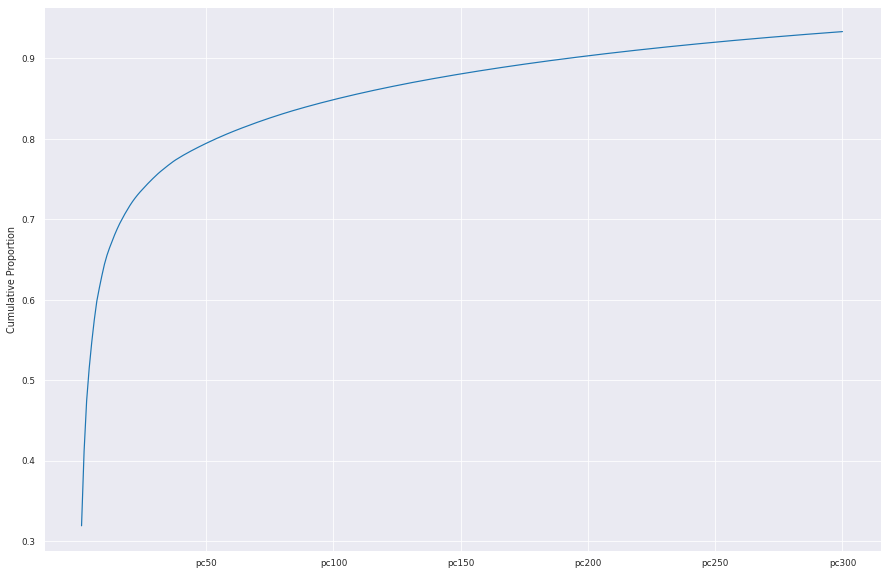

In [27]:
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax.set_xticks([49,99,149, 199, 249, 299])
sns.lineplot(ax=ax, data= pca300_df.loc['Cumulative Proportion'])


In [20]:
# Export the overall PCA transformed dataset - only for Predictors

binarized_final_pca300_frame = pca300.predict(binarized_final_frame[predictor_cols])
h2o.export_file(frame=binarized_final_pca300_frame, path= DATA_LOCATION + "processed/final.binarized_final_monolabel_frame.pc300.tsv", force=True)


pca prediction progress: |████████████████████████████████████████████████| 100%
Export File progress: |███████████████████████████████████████████████████| 100%


In [21]:
binarized_final_pca300_frame_df = binarized_final_pca300_frame.as_data_frame()
binarized_final_pca300_frame_df.to_csv(DATA_LOCATION + "processed/final.binarized_final_monolabel_df.pc300.tsv", "\t")


## Create the PCA transformed predictor columns

In [2]:
# train_frame_pca = pca300.predict(train_frame[predictor_cols])
# h2o.export_file(frame=train_frame_pca, path= DATA_LOCATION + "processed/final.train_frame.pca300.tsv", force=True)


train_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.train_frame.pca300.tsv")
train_frame_pca.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071,-0.603047
-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0.103305,0.0706207

In [3]:
# test_frame_pca = pca300.predict(test_frame[predictor_cols])
# h2o.export_file(frame=test_frame_pca, path= DATA_LOCATION + "processed/final.test_frame.pca300.tsv", force=True)

test_frame_pca = h2o.import_file(DATA_LOCATION + "processed/final.test_frame.pca300.tsv")
test_frame_pca.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201,0.0503638
-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387674,0.00351536,

## Create new dataframes from the PCA components

In [42]:
train_frame_pca_df = train_frame_pca.as_data_frame()
train_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.012587,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469
1,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.054867,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447
2,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,-0.161497,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164
3,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,-0.465097,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852
4,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.182978,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215


In [43]:
test_frame_pca_df = test_frame_pca.as_data_frame()
test_frame_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
0,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.127281,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708
1,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.005212,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535
2,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.052364,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860
3,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,0.033338,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166
4,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,0.317406,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837


In [44]:
response_col_df = train_frame[response_col].as_data_frame()
index_col_df = train_frame[index_col].as_data_frame()

train_pca_df = (train_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [46]:
train_pca_df.to_csv(DATA_LOCATION + "processed/train_pca_df.tsv", "\t")

train_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR10525336,-7.215279,5.487787,-0.045743,-3.295824,-8.025171,-2.949743,-2.967593,-2.266287,-0.652408,0.578522,...,0.371804,-0.071848,-0.341443,0.465335,-0.433011,-0.265740,-0.491029,-0.128080,0.655469,1
SRR10380004,-11.599985,5.534724,-0.067638,0.442869,6.543390,0.485848,-2.291297,-1.485078,-1.267895,2.487861,...,0.137572,0.059569,0.114289,-0.194232,0.028769,0.060136,0.102203,0.070037,-0.115447,1
SRR6807701,-9.149900,-4.451211,-0.000561,-0.211492,0.891811,-1.619368,-0.031481,-1.116217,-0.521429,0.226712,...,0.041387,0.080233,-0.031551,0.088953,0.104130,0.031573,-0.036647,0.139434,0.224164,1
SRR11033700,-4.590492,5.312944,-0.043539,-1.586112,-3.702485,-0.156249,2.930343,-4.974554,-0.930162,-0.817911,...,0.220127,0.127802,0.044233,0.098754,0.005934,-0.151121,0.346246,0.041682,-0.487852,1
SRR1163101,-8.682463,-4.772522,0.003525,0.094409,0.517031,-3.716390,0.988545,0.652860,-0.217747,0.573477,...,-0.093368,0.121302,0.067732,-0.121732,0.079970,-0.121168,0.044018,-0.070295,0.017215,1


In [45]:
response_col_df = test_frame[response_col].as_data_frame()
index_col_df = test_frame[index_col].as_data_frame()

test_pca_df = (test_frame_pca_df.join(response_col_df)).join(index_col_df).set_index('SampleID')
test_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300,Resistance_Status
SampleID,,,,,,,,,,,,,,,,,,,,,
ERR3335735,-9.629457,3.427494,-0.054488,-1.997283,-0.501536,5.336753,1.883176,2.342219,0.550157,2.244874,...,0.080378,0.342437,-0.283436,-0.272764,-0.157943,-0.103696,-0.056571,-0.413420,-0.201708,1
SRR8552929,-6.500589,5.032125,9.899641,-1.751147,-1.998420,5.184365,5.728812,22.975901,-72.911270,-19.434493,...,-0.002507,-0.001169,0.001140,-0.000947,0.004027,0.005030,-0.003485,0.002891,-0.003535,1
ERR067629,-12.947850,4.520129,-0.072757,0.795501,5.604925,-3.833929,-0.123111,0.276374,-0.394928,1.513401,...,-0.218587,0.404883,0.508618,0.063992,0.420349,-0.243656,-0.125900,-0.114601,0.135860,1
ERR067714,-8.945284,-5.015450,0.002182,0.197580,0.776913,-3.340270,0.435418,-0.418539,-0.392206,0.062804,...,-0.027150,0.042037,-0.027205,-0.192404,-0.003779,-0.075270,-0.038884,0.059448,0.089166,1
SRR5065314,-8.616033,-5.402211,0.008112,-0.470638,-0.436735,2.802968,-0.717564,0.032025,0.384208,-0.915967,...,-0.058061,0.173129,0.315004,0.085500,0.000209,0.275298,0.104563,-0.004634,0.090837,1


In [41]:
test_pca_df.to_csv(DATA_LOCATION + "processed/test_pca_df.tsv", "\t")

test_pca_df.head()

NameError: name 'test_pca_df' is not defined

In [42]:
# train_pca_df_frame = h2o.H2OFrame(train_pca_df)
train_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/train_pca_df.tsv")

train_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


SampleID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199
SRR10525336,-7.21528,5.48779,-0.0457426,-3.29582,-8.02517,-2.94974,-2.96759,-2.26629,-0.652408,0.578522,0.182181,0.434753,2.51645,-2.40717,-0.0528002,-0.867347,-0.77548,0.779273,-0.362249,-0.189216,-1.43005,0.0339925,0.0361673,-0.59373,0.642088,-0.0192343,0.0159929,0.10032,-2.14885,0.72847,-0.426612,-2.17743,0.564177,-0.419728,-0.040311,0.174175,0.0958375,-0.840905,-0.412918,0.0362403,-1.12543,1.47642,-0.288826,0.204485,0.970888,0.830999,0.392813,-0.160212,0.045166,-0.775327,0.854433,3.10933,1.62966,-0.403796,2.37824,-1.07053,1.22014,-0.0348898,0.709709,-1.60722,-0.537093,-0.519959,-0.607373,1.96028,-1.37502,0.788434,0.623542,0.117146,-0.662954,-0.788601,0.0349831,-0.104036,0.64312,0.498023,1.10188,1.07592,0.471287,-0.870997,0.134068,0.192699,0.590267,1.93532,1.70993,0.0663423,-0.0086952,-0.131918,0.4172,-1.12597,0.123066,-2.76761,-0.0105532,-0.186149,-0.528908,-0.59734,-0.125254,0.853391,-0.353671,0.527961,-1.19337,0.320649,-0.910347,0.726797,-1.19437,0.643785,2.2666,1.23807,-1.71336,1.6379,-1.35046,-0.0621283,-2.1299,0.338774,-0.294789,0.635849,0.393347,0.461294,0.799493,0.182817,-0.0629657,-0.0312119,0.38403,-0.29482,0.102779,-0.0105114,-0.613126,-0.635172,0.318172,-0.604303,-1.23884,-0.367584,0.13739,0.403578,1.11971,-1.58696,0.0275307,1.58684,-0.519128,0.250662,-0.731469,1.03236,-0.272874,-0.146155,-1.12871,0.518941,-0.731375,-0.186096,0.206038,-0.129464,0.20192,0.0572525,0.337063,1.8732,0.718144,0.609294,-0.0976525,1.02692,1.16342,-0.027039,-0.366797,-0.126558,0.145244,0.0541146,-0.293231,-0.430163,-0.623036,0.119761,0.0857521,0.654185,-0.597948,0.906505,0.00763198,0.760529,-0.196652,1.37364,0.38687,1.06562,-0.592595,0.096302,-0.982776,0.205194,0.795516,1.4415,0.103181,0.958078,-0.024321,0.423626,0.416048,-0.422432,-0.822004,0.286042,-0.334727,0.236006,0.430699,-1.99712,0.0612397,-0.281902,0.561714,-0.545934,0.920071
SRR10380004,-11.6,5.53472,-0.0676378,0.442869,6.54339,0.485848,-2.2913,-1.48508,-1.26789,2.48786,1.61519,-1.82951,-1.14724,-0.686728,0.0791433,0.244093,-0.673544,-0.298431,0.569891,1.3156,0.936164,-1.74636,-1.05101,0.351799,-0.744067,0.26847,-0.322997,-0.0033458,0.139044,0.83802,0.0462784,0.18821,0.0188327,0.311519,-0.103977,0.924853,1.06325,-0.617407,0.416026,0.152573,-0.00922459,-0.540769,-0.42493,0.224336,0.842236,-0.0829223,0.104743,-0.249455,-0.237306,0.123351,0.373262,0.402359,0.0419783,-1.21117,-0.482892,-0.974701,-0.132585,0.422715,-0.532571,-0.512553,-0.417771,0.55964,-0.123657,-0.481367,-0.395624,0.235399,-0.338215,-0.311371,0.25003,-0.187722,-0.145724,0.0526789,0.49318,0.0865632,-0.12011,-0.482305,0.176727,-0.126995,-0.1996,-0.169428,0.0459824,-0.10309,-0.100268,-0.066558,0.290223,0.0640084,0.192294,0.367173,-0.726469,-0.255324,0.376527,0.0864552,0.429294,0.361994,-0.0955574,0.10195,0.101228,-0.164574,0.105739,0.0161596,-0.309447,-0.148715,0.0122466,0.408371,-0.140452,0.34785,0.134036,0.312078,0.0964443,0.262582,0.0372175,0

In [43]:
# test_pca_df_frame = h2o.H2OFrame(test_pca_df)
test_pca_df_frame = h2o.import_file(DATA_LOCATION + "processed/test_pca_df.tsv")

test_pca_df_frame.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


SampleID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125,PC126,PC127,PC128,PC129,PC130,PC131,PC132,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150,PC151,PC152,PC153,PC154,PC155,PC156,PC157,PC158,PC159,PC160,PC161,PC162,PC163,PC164,PC165,PC166,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177,PC178,PC179,PC180,PC181,PC182,PC183,PC184,PC185,PC186,PC187,PC188,PC189,PC190,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199
ERR3335735,-9.62946,3.42749,-0.0544876,-1.99728,-0.501536,5.33675,1.88318,2.34222,0.550157,2.24487,1.01714,-0.274509,0.473391,-1.15809,0.0800588,-1.07554,1.76168,2.19104,-0.0812096,-1.188,0.480369,1.51523,-0.73458,0.856701,-0.463986,1.1826,-0.756524,0.0237812,0.516223,1.13772,-0.564756,0.633247,-0.349465,-0.067741,0.234908,-0.444675,0.17611,-0.532194,0.0915564,-0.113063,1.13146,-0.302093,0.490816,-0.493271,-0.585398,0.8064,-0.424099,-0.672412,0.236234,0.621226,0.421086,-0.957542,0.609662,-0.625019,0.188252,0.878188,-0.0257143,-0.138875,-0.0223257,1.23374,-0.363303,-0.19214,0.637254,0.567913,0.199097,-0.825055,0.482516,0.0236314,-0.274883,-0.26622,0.389476,-0.254482,0.476774,0.806681,-0.515323,-0.268944,-0.521861,-0.0541904,0.0623078,-0.427573,0.209428,0.675307,-0.156747,-0.488074,0.266841,0.216901,-0.365613,-0.483448,-0.16199,-0.311047,-0.877527,-0.30912,-0.48697,0.149168,-0.372397,-0.163269,-0.117403,0.138337,-0.19628,0.201152,-0.0601995,0.192374,-0.52172,-0.127364,-0.232277,-0.0896376,-0.125402,0.187321,-0.271664,-0.2616,0.0108175,0.43486,-0.319592,0.198224,-0.258672,-0.383842,-0.435208,0.323674,-0.708164,-0.422046,-0.207349,-0.780153,0.00302298,0.213339,0.0179504,0.450774,-0.478498,-0.0366665,0.0296298,0.283827,-0.472738,0.0141913,0.275673,0.052553,0.255064,0.240547,0.15366,-0.170729,0.243725,0.588446,0.528715,-0.147671,-0.216204,0.56448,-0.525028,0.0715956,0.332453,-0.223248,0.61728,0.123985,-0.0749367,0.0996517,-0.257484,-0.405051,0.293621,-0.227607,-0.427547,-0.384105,0.20133,-0.0139542,-0.396255,0.0760807,0.15238,0.0874545,0.195867,0.241876,0.124269,-0.272356,0.188318,0.0350412,0.100087,0.0796334,-0.349118,0.14185,-0.00669717,0.19513,0.223768,-0.268808,-0.19858,-0.134069,0.213021,-0.0708481,-0.370438,-0.42775,-0.0108664,-0.189859,-0.370499,-0.286406,0.192455,0.252574,-0.241866,-0.0577385,0.207005,-0.373174,-0.254423,0.370247,0.0748705,0.00531612,0.150201
SRR8552929,-6.50059,5.03212,9.89964,-1.75115,-1.99842,5.18436,5.72881,22.9759,-72.9113,-19.4345,3.5075,0.688388,1.69246,-0.351719,0.807579,0.162097,0.751626,-0.18388,0.114748,-0.708287,-0.431597,0.0908924,0.351024,-0.106659,-0.333741,-0.275902,-0.0169099,0.738175,0.298389,0.173786,-0.232006,-0.157514,-0.0104423,-0.0416099,0.00259742,0.153628,-0.130673,-0.0629438,0.103533,0.00953883,-0.0284005,0.101688,-0.15913,0.126722,-0.0756605,-0.0757435,0.0441156,0.0158992,0.0966239,-0.0160974,-0.00503431,0.0116024,0.0095455,-0.0067565,-0.026261,-0.0215083,0.0502305,-0.0297334,0.00990971,-0.0598099,0.0232784,-0.0248749,-0.0285802,0.00209873,0.0368059,0.0434571,-0.0579956,-0.000134279,0.0298716,-0.0178984,0.0093227,-0.0204604,-0.0540928,0.0371086,0.00754352,-0.0336085,-0.0019139,0.00628899,-0.0455008,0.052359,0.0163493,0.00218547,0.0132377,0.00211587,-0.0146862,-0.00559338,-0.000155938,0.00755395,0.0033325,0.00209277,0.00105389,-0.0748952,0.0101986,-0.0145325,-0.00125014,-0.0258381,-0.0540903,-0.0410478,0.0387

## Model development with the transformed PCA datasets

In [44]:
index_col = 'SampleID'
nfolds = 5

# Identify predictors and response columns
predictor_cols = train_pca_df_frame.columns
response_col = "Resistance_Status"

predictor_cols.remove(response_col)


In [45]:
# For binary classification, response should be a factor
train_pca_df_frame[response_col] = train_pca_df_frame[response_col].asfactor()
test_pca_df_frame[response_col] = test_pca_df_frame[response_col].asfactor()

x = predictor_cols
y = response_col

## AutoML models on transformed data

In [62]:
from h2o.automl import H2OAutoML

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1234, stopping_metric= 'AUTO')
aml.train(x=x, y=y, training_frame=train_pca_df_frame)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)   


AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201108_044243,0.898379,0.385515,0.939439,0.201463,0.345492,0.119365
StackedEnsemble_AllModels_AutoML_20201108_044243,0.897125,0.389261,0.93964,0.194425,0.347953,0.121071
GBM_4_AutoML_20201108_044243,0.884563,0.412288,0.930272,0.205892,0.360915,0.13026
GBM_grid__1_AutoML_20201108_044243_model_2,0.883757,0.412247,0.929666,0.212998,0.358975,0.128863
GBM_2_AutoML_20201108_044243,0.882101,0.408096,0.924653,0.190866,0.356368,0.126998
GBM_grid__1_AutoML_20201108_044243_model_1,0.879994,0.411873,0.926902,0.219601,0.360577,0.130016
GBM_3_AutoML_20201108_044243,0.876952,0.418408,0.923052,0.212156,0.363543,0.132164
GBM_1_AutoML_20201108_044243,0.876497,0.422203,0.925008,0.222101,0.365536,0.133617
GLM_1_AutoML_20201108_044243,0.875757,0.426938,0.921075,0.228976,0.368016,0.135436
XGBoost_grid__1_AutoML_20201108_044243_model_3,0.872385,0.513561,0.917598,0.220728,0.371594,0.138082


In [65]:
all_automl_model_ids = aml.leaderboard['model_id'].as_data_frame()['model_id'].tolist()

for mdl_id in all_automl_model_ids:
    print(mdl_id)
    h2o.save_model(model= h2o.get_model(mdl_id), path= MODELS_LOCATION + "pca300/aml_models", force=True)




StackedEnsemble_BestOfFamily_AutoML_20201108_044243
StackedEnsemble_AllModels_AutoML_20201108_044243
GBM_4_AutoML_20201108_044243
GBM_grid__1_AutoML_20201108_044243_model_2
GBM_2_AutoML_20201108_044243
GBM_grid__1_AutoML_20201108_044243_model_1
GBM_3_AutoML_20201108_044243
GBM_1_AutoML_20201108_044243
GLM_1_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_3
GBM_5_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_4
XGBoost_grid__1_AutoML_20201108_044243_model_1
XGBoost_3_AutoML_20201108_044243
DeepLearning_grid__2_AutoML_20201108_044243_model_1
XGBoost_1_AutoML_20201108_044243
DRF_1_AutoML_20201108_044243
XRT_1_AutoML_20201108_044243
XGBoost_grid__1_AutoML_20201108_044243_model_2
XGBoost_2_AutoML_20201108_044243
DeepLearning_grid__1_AutoML_20201108_044243_model_1
DeepLearning_1_AutoML_20201108_044243


## Naive-Bayes Grid

In [69]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator



hyper_params = {
                "laplace": [0.1, 0.3, 0.6, 0.9, 1.0],
                "min_sdev":[0.1, 0.3, 0.6, 0.9, 1.0],
                "eps_sdev":[0.1, 0.3, 0.6, 0.9, 1.0],
                "min_prob":[0.1, 0.3, 0.6, 0.9, 1.0],
                "eps_prob":[0.1, 0.3, 0.6, 0.9, 1.0],
                # "compute_metrics": [True, False]
                }

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2ONaiveBayesEstimator(
                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




nb_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


nb_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 


naivebayes Grid Build progress: |█████████████████████████████████████████| 100%


In [71]:
h2o.save_grid(MODELS_LOCATION + "pca300/nb_grid", nb_grid.grid_id)

'../../models/pca300/nb_grid/Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178'

## GLM Grid

In [76]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGeneralizedLinearEstimator


hyper_params = {
# lambda //use self.lambda_
# "missing_values_handling" : ["mean_imputation", "skip", "plug_values"],
# 'standardize'

"alpha" : [0, 0.3, 0.6, 0.9, 1],
"theta" : [0, 0.3, 0.6, 0.9, 1],
"tweedie_link_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
"tweedie_variance_power" : [0, 0.3, 0.6, 0.9, 1, 3, 6, 9],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}


# Train and cross-validate a NB
base_model = H2OGeneralizedLinearEstimator(
                                family= "binomial",

                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
glm_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


glm_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 



glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [77]:
h2o.save_grid(MODELS_LOCATION + "pca300/glm_grid", glm_grid.grid_id)

'../../models/pca300/glm_grid/Grid_GLM_py_30_sid_bdfe_model_python_1604806499448_2504'

## GBM Grid

In [79]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OGradientBoostingEstimator



hyper_params = {
'learn_rate': [0.1, 0.3, 0.6, 0.9],
'learn_rate_annealing': [0.1, 0.3, 0.6, 0.9, 1],
'distribution': ['bernoulli', 'multinomial'],
'quantile_alpha':[0.1, 0.3, 0.5, 0.8, 1],
'tweedie_power': [1.1, 1.5,1.9],
'col_sample_rate': [0.1, 0.3, 0.7, 0.9],
'balance_classes': [True, False],
'ntrees': [10, 20, 50, 100, 150],
'max_depth': [5, 10, 15, 20], # defaults to 20
'sample_rate': [ 0.1, 0.3, 0.6, 0.9],
'col_sample_rate_per_tree': [ 0.1, 0.3, 0.6, 0.8, 1],
'col_sample_rate_change_per_level': [ 0.1, 0.3, 0.6, 0.8, 1, 1.3, 1.5, 1.7, 1.9],
'histogram_type': ["AUTO", "UniformAdaptive", "Random", "QuantilesGlobal", "RoundRobin"]

#'max_abs_leafnode_pred' # use default value
#'class_sampling_factors',
#'max_after_balance_size',
#'min_rows', # defaults to 1
#'nbins', # default is 20
#'nbins_top_level', # requires too much tuning
#'nbins_cats', # requires too much tuning
#'r2_stopping',
#'seed',
#'build_tree_one_node',
#'sample_rate_per_class':[ 0.1, 0.3, 0.6, 0.9],
#'score_tree_interval',
#'min_split_improvement',

}


search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}




base_model = H2OGradientBoostingEstimator(


                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234
                                 )




# Train the grid
gbm_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     parallelism= 1)


gbm_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [80]:
h2o.save_grid(MODELS_LOCATION + "pca300/gbm_grid", gbm_grid.grid_id)

'../../models/pca300/gbm_grid/Grid_GBM_py_30_sid_bdfe_model_python_1604806499448_4444'

## DRF Grid

In [123]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator



hyper_params = {
'mtries': [-1, 30, 60, 90, 150, 200],
'balance_classes': [True, False],
'ntrees': [10, 20, 50, 100, 150],
'max_depth': [5, 10, 15, 20], # defaults to 20
'sample_rate': [ 0.1, 0.3, 0.6, 0.9],
'col_sample_rate_per_tree': [ 0.1, 0.3, 0.6, 0.8, 1],
'col_sample_rate_change_per_level': [ 0.1, 0.3, 0.6, 0.8, 1, 1.3, 1.5, 1.7, 1.9],
'histogram_type': ["AUTO", "UniformAdaptive", "Random", "QuantilesGlobal", "RoundRobin"]

#'score_tree_interval',
#'min_split_improvement',
#'class_sampling_factors',
#'max_after_balance_size',
#'min_rows', # defaults to 1
#'nbins', # default is 20
#'nbins_top_level', # requires too much tuning
#'nbins_cats', # requires too much tuning
#'r2_stopping',
#'seed',
#'build_tree_one_node',
#'sample_rate_per_class':[ 0.1, 0.9],
}

search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2ORandomForestEstimator(

                                 nfolds=nfolds, 
                                 fold_assignment = "random",
                                 keep_cross_validation_predictions = True,
                                 seed=1234)




# Train the grid
drf_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria,
                     parallelism= 1)


drf_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 



drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [124]:
h2o.save_grid(MODELS_LOCATION + "pca300/drf_grid", drf_grid.grid_id)


'../../models/pca300/drf_grid/Grid_DRF_py_173_sid_9c98_model_python_1604825008375_8677'

## DL Grid

In [14]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ODeepLearningEstimator



hyper_params = {
#   'adaptive_rate',
#   'categorical_encoding',
#   'classification_stop',
#   'class_sampling_factors',
#   'col_major',
#   'elastic_averaging_moving_rate',
#   'elastic_averaging_regularization',
#   'elastic_averaging',
#   'epsilon',
#   'fast_mode',
#   'force_load_balance',
#   'initial_biases',
#   'initial_weights',
#   'initial_weight_distribution',
#   'initial_weight_scale',

#   'max_after_balance_size',
#   'max_categorical_features',
#   'max_w2',
#   'missing_values_handling',
#   'momentum_ramp',
#   'momentum_stable',
#   'momentum_start',
#   'nesterov_accelerated_gradient',
#   'overwrite_with_best_model',
#   'quantile_alpha',
#   'quiet_mode',
#   'rate_annealing',
#   'rate_decay',
#   'rate',
#   'regression_stop',
#   'replicate_training_data',
#   'reproducible',
#   'score_duty_cycle',
#   'score_interval',
#   'score_training_samples',
#   'score_validation_samples',
#   'score_validation_sampling',
#   'seed',
#   'shuffle_training_data',
#   'single_node_mode',
#   'sparsity_beta',
#   'target_ratio_comm_to_comp',
#   'train_samples_per_iteration',
#   'tweedie_power',
#   'use_all_factor_levels',
#   'variable_importances ',

# "hidden_dropout_ratios": [0, 0.1, 0.2, [0.5, 0.5], [0.5, 0.5]]  ,
              



              'l1': [0, 1e-5, 1e-2],
              'l2': [0, 1e-5, 1e-2],
              'sparse': [ True, False],
              'balance_classes': [ True, False],
       	      'average_activation': [0, 0.5, 1, 3, 5, 7, 10],
	            'epochs': [10, 20, 30],
              "activation" : ['Rectifier', 'RectifierWithDropout', 'TanHWithDropout', 'TanH', 'Maxout', 'MaxoutWithDropout'] ,
              'distribution': ['bernoulli', 'multinomial'],
              
              "hidden": [[10, 10, 10], [50], [500, 500], [500, 500, 500]]  ,
              "input_dropout_ratio":[0, 0.10, 0.15, 0.20]  ,
              "rho" : [0.95, 0.90] ,
              "standardize" : [True, False] ,
              'loss': ['Automatic', 'Quadratic', 'CrossEntropy'],
}





search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}

 

base_model = H2ODeepLearningEstimator(

                                        keep_cross_validation_predictions = True,
                                        nfolds= nfolds,
                                        fold_assignment = "random",
                                        seed=1234)






# Train the grid
dl_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


dl_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [16]:
h2o.save_grid(MODELS_LOCATION + "PCA300/dl_grid", dl_grid.grid_id)

'../../models/PCA300/dl_grid_LATEST/Grid_DeepLearning_py_3_sid_b60c_model_python_1605362597414_758'

## XGB Grid

In [118]:
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2OXGBoostEstimator



hyper_params = {
 'distribution': ['bernoulli', 'multinomial'],
 'categorical_encoding': ['auto',  'binary',  'label_encoder'],
 'ntrees': [10, 50, 70, 100],
 'booster': ['gbtree', 'gblinear', 'dart'], 
 'col_sample_rate': [0.1, 0.3, 0.6, 0.8, 1], 
 'colsample_bylevel': [0.1, 0.3, 0.6, 0.8, 1], 
 'colsample_bytree': [0.1, 0.3, 0.6, 0.8, 1], 
 'learn_rate': [0.1, 0.3, 0.6, 0.8, 1], 
#  'grow_policy': ['lossguide'], 
 'max_depth': [0, 3, 6], 
 'normalize_type': ['tree', 'forest'], 
 'sample_type': ['uniform', 'weighted'], 
 'sample_rate': [0.1, 0.3, 0.6, 0.8, 1], 
#  'tree_method': ['auto', 'exact', 'approx', 'hist'], 
 'tweedie_power': [1.2, 1.5, 1.8],

# 'max_abs_leafnode_pred'
# 'min_split_improvement',  
# 'max_bins', 
# 'max_delta_step', 
# 'max_leaves', 
# 'min_rows':  
# 'one_drop', 
# 'rate_drop', 
# 'reg_alpha', 
# 'reg_lambda', 
# 'skip_drop', 
# 'num_leaves'

}



search_criteria = {"strategy": "RandomDiscrete", 
                   "max_models": MAX_MODELS}



base_model = H2OXGBoostEstimator(grow_policy= 'lossguide',
                                tree_method='hist',

                              keep_cross_validation_predictions = True,
                              nfolds= nfolds,
                              fold_assignment = "random",
                              seed=1234)







# Train the grid
xgb_grid = H2OGridSearch(model=base_model,
                     hyper_params=hyper_params,
                     search_criteria=search_criteria)


xgb_grid.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame) 




xgboost Grid Build progress: |████████████████████████████████████████████| 100%
Errors/Warnings building gridsearch model

Hyper-parameter: booster, dart
Hyper-parameter: categorical_encoding, Binary
Hyper-parameter: col_sample_rate, 1.0
Hyper-parameter: colsample_bylevel, 0.3
Hyper-parameter: colsample_bytree, 0.1
Hyper-parameter: distribution, multinomial
Hyper-parameter: learn_rate, 1.0
Hyper-parameter: max_depth, 0
Hyper-parameter: normalize_type, forest
Hyper-parameter: ntrees, 100
Hyper-parameter: sample_rate, 0.3
Hyper-parameter: sample_type, weighted
Hyper-parameter: tweedie_power, 1.5
failure_details: Cannot perform booster operation: updater is inactive on node /127.0.0.1:54321
failure_stack_traces: java.lang.IllegalStateException: Cannot perform booster operation: updater is inactive on node /127.0.0.1:54321
	at ml.dmlc.xgboost4j.java.XGBoostUpdater.invoke(XGBoostUpdater.java:108)
	at ml.dmlc.xgboost4j.java.XGBoostUpdater.doUpdate(XGBoostUpdater.java:178)
	at ml.dmlc.xgboos

In [120]:
h2o.save_grid(MODELS_LOCATION + "pca300/xgb_grid", xgb_grid.grid_id)

'../../models/pca300/xgb_grid/Grid_XGBoost_py_173_sid_9c98_model_python_1604825008375_1'

## Create Stackend Ensemble using the best models from the grids

In [6]:
nb_grid = h2o.load_grid(MODELS_LOCATION + "pca300/nb_grid/Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178")



glm_grid = h2o.load_grid(MODELS_LOCATION + "pca300/glm_grid/Grid_GLM_py_30_sid_bdfe_model_python_1604806499448_2504")



gbm_grid = h2o.load_grid(MODELS_LOCATION + "pca300/gbm_grid/Grid_GBM_py_30_sid_bdfe_model_python_1604806499448_4444")



xgb_grid = h2o.load_grid(MODELS_LOCATION + "pca300/xgb_grid/Grid_XGBoost_py_173_sid_9c98_model_python_1604825008375_1")



dl_grid = h2o.load_grid(MODELS_LOCATION + "pca300/dl_grid/Grid_DeepLearning_py_3_sid_b60c_model_python_1605362597414_758")


drf_grid = h2o.load_grid(MODELS_LOCATION + "pca300/drf_grid/Grid_DRF_py_173_sid_9c98_model_python_1604825008375_8677")


In [7]:
# Select best models from the grids based on performance on the test data

def best_model_from_grid (model_grid):

    sorted_grid = model_grid.get_grid(sort_by='auc', decreasing=True)

    for mdl in sorted_grid:
        print("Modeld ID: ", mdl.model_id)

        # print('Train data AUC: ', mdl.model_performance(train=True).auc()) # same result with model_performance()
        print('Default Test data AUC: ', mdl.model_performance(valid=True).auc())    
        print('Default Test data AUCPR: ', mdl.model_performance(valid=True).aucpr())    

        print('Default Cross-validation AUC: ', mdl.model_performance(xval=True).auc())
        print('Default Cross-validation AUCPR: ', mdl.model_performance(xval=True).aucpr())
        print("\n--------------------\n")

    print("\n@@@@@@@@@@@@@@@@@@@@@@@\n")
    return sorted_grid[0]


In [8]:
best_nb_model = best_model_from_grid(nb_grid)
best_glm_model = best_model_from_grid(glm_grid)
best_gbm_model = best_model_from_grid(gbm_grid)
best_xgb_model= best_model_from_grid(xgb_grid)
best_dl_model= best_model_from_grid(dl_grid)
best_drf_model= best_model_from_grid(drf_grid)




Modeld ID:  Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178_model_3
Default Test data AUC:  0.5736287073002505
Default Test data AUCPR:  0.722796224545721
Default Cross-validation AUC:  0.62177304964539
Default Cross-validation AUCPR:  0.7463032863986705

--------------------

Modeld ID:  Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178_model_10
Default Test data AUC:  0.5484717029077576
Default Test data AUCPR:  0.7123235647071509
Default Cross-validation AUC:  0.5759293735224587
Default Cross-validation AUCPR:  0.6842246540548909

--------------------

Modeld ID:  Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178_model_9
Default Test data AUC:  0.5590354666569862
Default Test data AUCPR:  0.7002563536407302
Default Cross-validation AUC:  0.5701713947990544
Default Cross-validation AUCPR:  0.7105505892531342

--------------------

Modeld ID:  Grid_NaiveBayes_py_30_sid_bdfe_model_python_1604806499448_2178_model_7
Default Test data AUC:  0.53203

In [9]:

def extract_params_from_model(actual_params_dict, extra_params = [], additional_keys = {}):
    final_params = actual_params_dict

    columns_to_be_removed =   [
                                'model_id',
                                'validation_frame',
                                'response_column',
                                'ignored_columns',
                                'training_frame',
                                *extra_params
]

    for col_name in columns_to_be_removed:
        del  final_params[col_name]

    return {**final_params, **additional_keys}

In [46]:
from h2o.estimators import H2ONaiveBayesEstimator

top_nb = H2ONaiveBayesEstimator(**extract_params_from_model(best_nb_model.actual_params))

top_nb.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_nb, MODELS_LOCATION + "PCA300/top_nb")

print('AUC on test_pca_df_frame data: ', top_nb.model_performance(valid=True).auc(), "\n\n============================")

top_nb.model_performance

naivebayes Model Build progress: |████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5736650088938905 

Model Details
H2ONaiveBayesEstimator :  Naive Bayes
Model Key:  NaiveBayes_model_python_1605467917228_1


Model Summary: 


ModelMetricsBinomial: naivebayes
** Reported on train data. **

MSE: 0.23176875895186294
RMSE: 0.4814236792596132
LogLoss: 0.8090609556633163
Mean Per-Class Error: 0.3141134751773049
AUC: 0.7467124704491725
AUCPR: 0.8338461959696989
Gini: 0.4934249408983451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06978097423895066: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 57.53 %


ModelMetricsBinomial: naivebayes
** Reported on validation data. **

MSE: 0.35348622076185887
RMSE: 0.5945470719479315
LogLoss: 1.2712951498433689
Mean Per-Class Error: 0.43942171561331544
AUC: 0.5736650088938905
AUCPR: 0.7243829622084862
Gini: 0.147330017787781

Confusion M

,,number_of_response_levels,min_apriori_probability,max_apriori_probability
0,,2.0,0.346022,0.653978



RMSE: 0.5645639736782155
LogLoss: 1.2753938215212923
Mean Per-Class Error: 0.41355348699763594
AUC: 0.62177304964539
AUCPR: 0.7463032863986705
Gini: 0.24354609929078008

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.00026154732736230425: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 58.42 %


,,0,1,Error,Rate
0,0,148.0,275.0,0.6501,(275.0/423.0)
1,1,62.0,738.0,0.0775,(62.0/800.0)
2,Total,210.0,1013.0,0.2756,(337.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.069781,0.814120,354.0
1,max f2,0.000378,0.904364,399.0
2,max f0point5,0.320159,0.779862,264.0
3,max accuracy,0.135834,0.730989,326.0
4,max precision,0.999263,0.960000,1.0
5,max recall,0.000378,1.000000,399.0
6,max specificity,0.999880,0.997636,0.0
7,max absolute_mcc,0.179494,0.371467,311.0
8,max min_per_class_accuracy,0.563942,0.683215,189.0
9,max mean_per_class_accuracy,0.699184,0.685887,145.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999884,1.411154,1.411154,0.923077,0.999963,0.923077,0.999963,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.999515,1.401354,1.406450,0.916667,0.999722,0.920000,0.999847,0.01375,0.02875,40.135417,40.645000
2,,3,0.030253,0.999176,1.528750,1.446115,1.000000,0.999405,0.945946,0.999704,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.998847,1.528750,1.466352,1.000000,0.999075,0.959184,0.999550,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.998293,1.411154,1.454778,0.923077,0.998601,0.951613,0.999351,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,0.994998,1.328258,1.392033,0.868852,0.996639,0.910569,0.998006,0.06625,0.14000,32.825820,39.203252
6,,7,0.150450,0.986820,1.328258,1.370890,0.868852,0.991332,0.896739,0.995793,0.06625,0.20625,32.825820,37.088995
7,,8,0.200327,0.972453,1.228012,1.335316,0.803279,0.981436,0.873469,0.992219,0.06125,0.26750,22.801230,33.531633
8,,9,0.300082,0.926313,1.265605,1.312142,0.827869,0.952795,0.858311,0.979113,0.12625,0.39375,26.560451,31.214237
9,,10,0.399836,0.844079,1.140297,1.269269,0.745902,0.889900,0.830266,0.956855,0.11375,0.50750,14.029713,26.926892


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.000019,0.805721,399.0
1,max f2,0.000019,0.912035,399.0
2,max f0point5,0.033002,0.731707,358.0
3,max accuracy,0.004415,0.678643,389.0
4,max precision,0.999972,1.000000,0.0
5,max recall,0.000019,1.000000,399.0
6,max specificity,0.999972,1.000000,0.0
7,max absolute_mcc,0.072467,0.137092,329.0
8,max min_per_class_accuracy,0.435723,0.553254,214.0
9,max mean_per_class_accuracy,0.630219,0.560578,168.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.999151,0.988166,0.988166,0.666667,0.999484,0.666667,0.999484,0.011834,0.011834,-1.183432,-1.183432
1,,2,0.021956,0.997826,1.185799,1.077999,0.800000,0.998375,0.727273,0.998980,0.011834,0.023669,18.579882,7.799892
2,,3,0.031936,0.996729,1.185799,1.111686,0.800000,0.997253,0.750000,0.998440,0.011834,0.035503,18.579882,11.168639
3,,4,0.041916,0.995198,1.482249,1.199915,1.000000,0.995839,0.809524,0.997821,0.014793,0.050296,48.224852,19.991547
4,,5,0.053892,0.992816,0.988166,1.152860,0.666667,0.993714,0.777778,0.996908,0.011834,0.062130,-1.183432,15.285996
5,,6,0.101796,0.982072,1.049926,1.104420,0.708333,0.987526,0.745098,0.992493,0.050296,0.112426,4.992604,10.442047
6,,7,0.151697,0.960561,1.067219,1.092183,0.720000,0.972885,0.736842,0.986043,0.053254,0.165680,6.721893,9.218312
7,,8,0.201597,0.915961,1.126509,1.100680,0.760000,0.940022,0.742574,0.974652,0.056213,0.221893,12.650888,10.067959
8,,9,0.301397,0.793827,1.096864,1.099416,0.740000,0.858133,0.741722,0.936069,0.109467,0.331361,9.686391,9.941612
9,,10,0.401198,0.645576,1.037574,1.084033,0.700000,0.724299,0.731343,0.883390,0.103550,0.434911,3.757396,8.403250


,,0,1,Error,Rate
0,0,0.0,423.0,1.0,(423.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,0.0,1223.0,0.3459,(423.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.000262,0.790905,399.0
1,max f2,0.000262,0.904364,399.0
2,max f0point5,0.069536,0.726111,351.0
3,max accuracy,0.028679,0.674571,371.0
4,max precision,0.999896,0.868421,0.0
5,max recall,0.000262,1.000000,399.0
6,max specificity,0.999896,0.988180,0.0
7,max absolute_mcc,0.028679,0.191441,371.0
8,max min_per_class_accuracy,0.677169,0.572500,155.0
9,max mean_per_class_accuracy,0.545321,0.586447,197.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999964,1.175962,1.175962,0.769231,0.999988,0.769231,0.999988,0.01250,0.01250,17.596154,17.596154
1,,2,0.020442,0.999885,1.528750,1.345300,1.000000,0.999930,0.880000,0.999960,0.01500,0.02750,52.875000,34.530000
2,,3,0.030253,0.999742,1.401354,1.363480,0.916667,0.999825,0.891892,0.999916,0.01375,0.04125,40.135417,36.347973
3,,4,0.040065,0.999622,1.146562,1.310357,0.750000,0.999685,0.857143,0.999860,0.01125,0.05250,14.656250,31.035714
4,,5,0.050695,0.999470,1.411154,1.331492,0.923077,0.999541,0.870968,0.999793,0.01500,0.06750,41.115385,33.149194
5,,6,0.100572,0.997892,1.202951,1.267744,0.786885,0.998813,0.829268,0.999307,0.06000,0.12750,20.295082,26.774390
6,,7,0.150450,0.995142,1.077643,1.204721,0.704918,0.996485,0.788043,0.998371,0.05375,0.18125,7.764344,20.472147
7,,8,0.200327,0.988102,1.177889,1.198041,0.770492,0.991979,0.783673,0.996780,0.05875,0.24000,17.788934,19.804082
8,,9,0.300082,0.955576,1.127766,1.174680,0.737705,0.976113,0.768392,0.989910,0.11250,0.35250,12.776639,17.467984
9,,10,0.399836,0.872114,0.964867,1.122334,0.631148,0.919737,0.734151,0.972402,0.09625,0.44875,-3.513320,12.233384




Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6813875,0.032319296,0.7108434,0.63095236,0.6987448,0.6680498,0.6983471
1,auc,0.6512176,0.020242797,0.6659452,0.64347064,0.6209906,0.67228264,0.65339893
2,aucpr,0.7582092,0.026206708,0.7725955,0.7343244,0.73981434,0.797079,0.74723285
3,err,0.31861252,0.032319296,0.28915662,0.3690476,0.30125523,0.33195022,0.30165288
4,err_count,78.0,9.027735,72.0,93.0,72.0,80.0,73.0
5,f0point5,0.7236188,0.027202625,0.7522124,0.68123394,0.73913044,0.71555555,0.7299618
6,f1,0.8002306,0.015225069,0.8095238,0.77372265,0.8095238,0.80099505,0.8073879
7,f2,0.8958176,0.012522429,0.87628865,0.8952703,0.8947368,0.90960455,0.9031877
8,lift_top_group,1.4234031,0.20615338,1.5090909,1.0566038,1.5031446,1.4968944,1.551282
9,logloss,1.2761745,0.1843319,1.1700575,1.3332363,1.5758824,1.1597352,1.1419615


<bound method ModelBase.model_performance of >

In [47]:
from h2o.estimators import H2OGeneralizedLinearEstimator

top_glm = H2OGeneralizedLinearEstimator(**extract_params_from_model(best_glm_model.actual_params, ['lambda']))

top_glm.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_glm, MODELS_LOCATION + "PCA300/top_glm")


print('AUC on test_pca_df_frame data: ', top_glm.model_performance(valid=True).auc(), "\n\n============================")

top_glm.model_performance

glm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6266381094130032 

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1605467917228_20


GLM Model: summary


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.06737869858143082
RMSE: 0.2595740714736948
LogLoss: 0.23465203622551015
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.310356148988
Residual deviance: 573.958880607598
AIC: 1175.958880607598
AUC: 0.9708421985815603
AUCPR: 0.9839626762765715
Gini: 0.9416843971631206



,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.01677 ),300,300,5,py_7_sid_80ae


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5308632131207871: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.25607792452539224
RMSE: 0.5060414257008928
LogLoss: 0.9472698917241775
Null degrees of freedom: 500
Residual degrees of freedom: 200
Null deviance: 633.0394016859412
Residual deviance: 2383.229676671357
AIC: 2985.229676671357
AUC: 0.6266381094130032
AUCPR: 0.7515512182825628
Gini: 0.2532762188260065

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.7755963216651885e-34: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 64.06 %


,,0,1,Error,Rate
0,0,366.0,57.0,0.1348,(57.0/423.0)
1,1,45.0,755.0,0.0563,(45.0/800.0)
2,Total,411.0,812.0,0.0834,(102.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.530863,0.936725,219.0
1,max f2,0.350370,0.953659,270.0
2,max f0point5,0.708890,0.953228,167.0
3,max accuracy,0.642200,0.916599,188.0
4,max precision,0.999739,1.000000,0.0
5,max recall,0.113270,1.000000,347.0
6,max specificity,0.999739,1.000000,0.0
7,max absolute_mcc,0.642200,0.822160,188.0
8,max min_per_class_accuracy,0.627963,0.912530,193.0
9,max mean_per_class_accuracy,0.642200,0.919539,188.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.999616,1.528750,1.528750,1.000000,0.999787,1.000000,0.999787,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.998603,1.528750,1.528750,1.000000,0.999156,1.000000,0.999484,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.997103,1.528750,1.528750,1.000000,0.997897,1.000000,0.998970,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.995161,1.528750,1.528750,1.000000,0.996197,1.000000,0.998291,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.993913,1.528750,1.528750,1.000000,0.994620,1.000000,0.997521,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.987903,1.528750,1.528750,1.000000,0.991093,1.000000,0.994333,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.979469,1.528750,1.528750,1.000000,0.983049,1.000000,0.990592,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.969746,1.528750,1.528750,1.000000,0.975220,1.000000,0.986765,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.945710,1.503689,1.520419,0.983607,0.957797,0.994550,0.977135,0.15000,0.45625,50.368852,52.041894
9,,10,0.399836,0.898344,1.491158,1.513119,0.975410,0.922858,0.989775,0.963594,0.14875,0.60500,49.115779,51.311861


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,1.775596e-34,0.805721,399.0
1,max f2,1.775596e-34,0.912035,399.0
2,max f0point5,7.193462e-01,0.744361,180.0
3,max accuracy,5.300331e-02,0.678643,384.0
4,max precision,8.944720e-01,0.832117,89.0
5,max recall,1.775596e-34,1.000000,399.0
6,max specificity,9.999816e-01,0.987730,0.0
7,max absolute_mcc,7.274565e-01,0.262032,176.0
8,max min_per_class_accuracy,6.789091e-01,0.612426,199.0
9,max mean_per_class_accuracy,7.274565e-01,0.639743,176.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,9.993451e-01,0.741124,0.741124,0.500000,0.999707,0.500000,0.999707,0.008876,0.008876,-25.887574,-25.887574
1,,2,0.021956,9.942697e-01,1.482249,1.077999,1.000000,0.995651,0.727273,0.997863,0.014793,0.023669,48.224852,7.799892
2,,3,0.031936,9.906410e-01,0.889349,1.019046,0.600000,0.992628,0.687500,0.996227,0.008876,0.032544,-11.065089,1.904586
3,,4,0.041916,9.865676e-01,1.185799,1.058749,0.800000,0.988036,0.714286,0.994277,0.011834,0.044379,18.579882,5.874894
4,,5,0.051896,9.830744e-01,1.482249,1.140191,1.000000,0.984516,0.769231,0.992400,0.014793,0.059172,48.224852,14.019117
5,,6,0.101796,9.663331e-01,1.126509,1.133484,0.760000,0.974368,0.764706,0.983561,0.056213,0.115385,12.650888,13.348416
6,,7,0.151697,9.474713e-01,1.363669,1.209203,0.920000,0.956715,0.815789,0.974730,0.068047,0.183432,36.366864,20.920274
7,,8,0.201597,9.352137e-01,1.185799,1.203410,0.800000,0.940910,0.811881,0.966359,0.059172,0.242604,18.579882,20.340969
8,,9,0.301397,8.765075e-01,1.245089,1.217211,0.840000,0.905349,0.821192,0.946157,0.124260,0.366864,24.508876,21.721071
9,,10,0.401198,8.087037e-01,1.037574,1.172525,0.700000,0.848144,0.791045,0.921775,0.103550,0.470414,3.757396,17.252495




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.1395447128968992
RMSE: 0.3735568402491102
LogLoss: 0.4527805055290165
Null degrees of freedom: 1222
Residual degrees of freedom: 922
Null deviance: 1577.9471491067366
Residual deviance: 1107.5011165239741
AIC: 1709.5011165239741
AUC: 0.8693484042553191
AUCPR: 0.9206885107574454
Gini: 0.7386968085106382

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5371233996347867: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 66.03 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 


,,0,1,Error,Rate
0,0,290.0,133.0,0.3144,(133.0/423.0)
1,1,102.0,698.0,0.1275,(102.0/800.0)
2,Total,392.0,831.0,0.1922,(235.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.537123,0.855917,218.0
1,max f2,0.119758,0.910047,344.0
2,max f0point5,0.735585,0.868885,152.0
3,max accuracy,0.550566,0.808667,213.0
4,max precision,0.999730,1.000000,0.0
5,max recall,0.000151,1.000000,399.0
6,max specificity,0.999730,1.000000,0.0
7,max absolute_mcc,0.694445,0.583450,170.0
8,max min_per_class_accuracy,0.702083,0.798750,167.0
9,max mean_per_class_accuracy,0.735585,0.801497,152.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.998523,1.411154,1.411154,0.923077,0.999516,0.923077,0.999516,0.01500,0.01500,41.115385,41.115385
1,,2,0.020442,0.997224,1.401354,1.406450,0.916667,0.998027,0.920000,0.998801,0.01375,0.02875,40.135417,40.645000
2,,3,0.030253,0.996328,1.528750,1.446115,1.000000,0.996829,0.945946,0.998162,0.01500,0.04375,52.875000,44.611486
3,,4,0.040065,0.994908,1.528750,1.466352,1.000000,0.995508,0.959184,0.997512,0.01500,0.05875,52.875000,46.635204
4,,5,0.050695,0.993039,1.411154,1.454778,0.923077,0.993942,0.951613,0.996763,0.01500,0.07375,41.115385,45.477823
5,,6,0.100572,0.984540,1.528750,1.491463,1.000000,0.988600,0.975610,0.992715,0.07625,0.15000,52.875000,49.146341
6,,7,0.150450,0.975300,1.478627,1.487208,0.967213,0.980045,0.972826,0.988515,0.07375,0.22375,47.862705,48.720788
7,,8,0.200327,0.963804,1.478627,1.485071,0.967213,0.969176,0.971429,0.983700,0.07375,0.29750,47.862705,48.507143
8,,9,0.300082,0.929459,1.453566,1.474598,0.950820,0.948175,0.964578,0.971890,0.14500,0.44250,45.356557,47.459809
9,,10,0.399836,0.872848,1.303197,1.431835,0.852459,0.903500,0.936605,0.954828,0.13000,0.57250,30.319672,43.183538


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8160008,0.021070773,0.7871486,0.8373016,0.8033473,0.8340249,0.8181818
1,auc,0.8698101,0.015944941,0.84415585,0.8861838,0.8792453,0.8706522,0.86881334
2,aucpr,0.92141294,0.018122284,0.8909563,0.9269646,0.93958586,0.92370063,0.92585725
3,err,0.18399917,0.021070773,0.2128514,0.16269842,0.19665273,0.16597511,0.18181819
4,err_count,45.0,5.2440443,53.0,41.0,47.0,40.0,44.0
5,f0point5,0.8489646,0.028703708,0.8145766,0.8882907,0.8304892,0.8639053,0.847561
6,f1,0.86426866,0.01006933,0.8515406,0.86557376,0.8613569,0.8795181,0.863354
7,f2,0.8812137,0.021759702,0.8920188,0.8439898,0.89460784,0.8957055,0.87974685
8,lift_top_group,1.4284575,0.23887382,1.0060606,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.45273125,0.03007873,0.49771476,0.4211145,0.43569115,0.44234762,0.4667883


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-11-15 19:19:41,0.000 sec,0,788.655178,0.644853
1,,2020-11-15 19:19:41,0.120 sec,1,378.294602,0.328072
2,,2020-11-15 19:19:41,0.153 sec,2,312.852395,0.292164
3,,2020-11-15 19:19:41,0.185 sec,3,291.179150,0.286272
4,,2020-11-15 19:19:41,0.216 sec,4,287.185359,0.285953
5,,2020-11-15 19:19:41,0.246 sec,5,286.979440,0.285951


<bound method ModelBase.model_performance of >

In [12]:
from h2o.estimators import H2OGradientBoostingEstimator

top_gbm = H2OGradientBoostingEstimator(**extract_params_from_model(best_gbm_model.actual_params))

top_gbm.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_gbm, MODELS_LOCATION + "PCA300/top_gbm")


print('AUC on test_pca_df_frame data: ', top_gbm.model_performance(valid=True).auc(), "\n\n============================")

top_gbm.model_performance

gbm Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5569935020147384 

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1605450290525_39


Model Summary: 


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.015691192817385e-33
RMSE: 4.4896449668290976e-17
LogLoss: 9.622538071158348e-18
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.41 %


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,150.0,150.0,80462.0,1.0,10.0,7.686667,2.0,87.0,37.97333


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)


,metric,threshold,value,idx
0,max f1,1.000000e+00,1.0,0.0
1,max f2,1.000000e+00,1.0,0.0
2,max f0point5,1.000000e+00,1.0,0.0
3,max accuracy,1.000000e+00,1.0,0.0
4,max precision,1.000000e+00,1.0,0.0
5,max recall,1.000000e+00,1.0,0.0
6,max specificity,1.000000e+00,1.0,0.0
7,max absolute_mcc,1.000000e+00,1.0,0.0
8,max min_per_class_accuracy,1.000000e+00,1.0,0.0
9,max mean_per_class_accuracy,1.000000e+00,1.0,0.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.616517,1.000000e+00,1.528750,1.528750,1.00000,1.000000e+00,1.000000,1.000000,0.9425,0.9425,52.875000,52.875000
1,,2,0.699918,2.087403e-17,0.689436,1.428738,0.45098,4.509804e-01,0.934579,0.934579,0.0575,1.0000,-31.056373,42.873832
2,,3,0.799673,3.586533e-18,0.000000,1.250511,0.00000,9.679615e-18,0.817996,0.817996,0.0000,1.0000,-100.000000,25.051125
3,,4,0.899428,5.047307e-19,0.000000,1.111818,0.00000,1.630406e-18,0.727273,0.727273,0.0000,1.0000,-100.000000,11.181818
4,,5,1.000000,1.000000e-19,0.000000,1.000000,0.00000,1.859889e-19,0.654129,0.654129,0.0000,1.0000,-100.000000,0.000000




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.386094728377163
RMSE: 0.621365213362611
LogLoss: 4.44770804705716
Mean Per-Class Error: 0.4255000544523905
AUC: 0.5569935020147384
AUCPR: 0.7182021038974806
Gini: 0.11398700402947681

Confusion Matrix (Act/Pred) for max f1 @ threshold = 5.997054880112864e-11: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 75.33 %




,,0,1,Error,Rate
0,0,4.0,159.0,0.9755,(159.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,4.0,497.0,0.3174,(159.0/501.0)


,metric,threshold,value,idx
0,max f1,5.997055e-11,0.809581,311.0
1,max f2,5.997055e-11,0.914008,311.0
2,max f0point5,6.125291e-08,0.727432,300.0
3,max accuracy,1.197387e-09,0.682635,309.0
4,max precision,9.999999e-01,0.750000,2.0
5,max recall,5.997055e-11,1.000000,311.0
6,max specificity,1.000000e+00,0.773006,0.0
7,max absolute_mcc,9.999592e-01,0.139661,58.0
8,max min_per_class_accuracy,9.998663e-01,0.564417,76.0
9,max mean_per_class_accuracy,9.999592e-01,0.574500,58.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.033932,1.000000e+00,1.220675,1.220675,0.823529,1.000000,0.823529,1.000000,0.041420,0.041420,22.067525,22.067525
1,,2,0.041916,1.000000e+00,1.111686,1.199915,0.750000,1.000000,0.809524,1.000000,0.008876,0.050296,11.168639,19.991547
2,,3,0.051896,1.000000e+00,1.482249,1.254210,1.000000,1.000000,0.846154,1.000000,0.014793,0.065089,48.224852,25.421029
3,,4,0.101796,1.000000e+00,1.185799,1.220675,0.800000,1.000000,0.823529,1.000000,0.059172,0.124260,18.579882,22.067525
4,,5,0.151697,1.000000e+00,0.948639,1.131190,0.640000,1.000000,0.763158,1.000000,0.047337,0.171598,-5.136095,13.118966
5,,6,0.201597,1.000000e+00,1.126509,1.130031,0.760000,1.000000,0.762376,1.000000,0.056213,0.227811,12.650888,13.003105
6,,7,0.301397,1.000000e+00,1.096864,1.119049,0.740000,1.000000,0.754967,1.000000,0.109467,0.337278,9.686391,11.904855
7,,8,0.401198,9.999982e-01,1.007929,1.091407,0.680000,1.000000,0.736318,1.000000,0.100592,0.437870,0.792899,9.140687
8,,9,0.500998,9.999435e-01,1.067219,1.086589,0.720000,0.999980,0.733068,0.999996,0.106509,0.544379,6.721893,8.658856
9,,10,0.600798,9.961731e-01,0.830059,1.043976,0.560000,0.998915,0.704319,0.999816,0.082840,0.627219,-16.994083,4.397570


ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.16866504419297862
RMSE: 0.4106885001956819
LogLoss: 1.9557627576485224
Mean Per-Class Error: 0.18732121749408992
AUC: 0.8782254728132387
AUCPR: 0.9117333177488975
Gini: 0.7564509456264774

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32318228841095886: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 71.99 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()



,,0,1,Error,Rate
0,0,268.0,155.0,0.3664,(155.0/423.0)
1,1,65.0,735.0,0.0813,(65.0/800.0)
2,Total,333.0,890.0,0.1799,(220.0/1223.0)


,metric,threshold,value,idx
0,max f1,3.231823e-01,0.869822,238.0
1,max f2,9.540450e-05,0.924430,356.0
2,max f0point5,9.999822e-01,0.876678,45.0
3,max accuracy,9.800485e-01,0.827473,167.0
4,max precision,1.000000e+00,0.937615,0.0
5,max recall,2.398012e-09,1.000000,399.0
6,max specificity,1.000000e+00,0.919622,0.0
7,max absolute_mcc,9.800485e-01,0.615008,167.0
8,max min_per_class_accuracy,9.998924e-01,0.807500,76.0
9,max mean_per_class_accuracy,9.999822e-01,0.812679,45.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.065413,1.000000e+00,1.490531,1.490531,0.975000,1.000000e+00,0.975000,1.000000,0.09750,0.09750,49.053125,49.053125
1,,2,0.103025,1.000000e+00,1.495516,1.492351,0.978261,1.000000e+00,0.976190,1.000000,0.05625,0.15375,49.551630,49.235119
2,,3,0.150450,1.000000e+00,1.476034,1.487208,0.965517,1.000000e+00,0.972826,1.000000,0.07000,0.22375,47.603448,48.720788
3,,4,0.200327,1.000000e+00,1.478627,1.485071,0.967213,1.000000e+00,0.971429,1.000000,0.07375,0.29750,47.862705,48.507143
4,,5,0.300082,1.000000e+00,1.403443,1.457936,0.918033,1.000000e+00,0.953678,1.000000,0.14000,0.43750,40.344262,45.793597
5,,6,0.399836,1.000000e+00,1.441035,1.453719,0.942623,1.000000e+00,0.950920,1.000000,0.14375,0.58125,44.103484,45.371933
6,,7,0.500409,9.999993e-01,1.242886,1.411346,0.813008,9.999999e-01,0.923203,1.000000,0.12500,0.70625,24.288618,41.134600
7,,8,0.600164,9.998290e-01,1.065113,1.353798,0.696721,9.999755e-01,0.885559,0.999996,0.10625,0.81250,6.511270,35.379768
8,,9,0.699918,8.250288e-01,0.852090,1.282293,0.557377,9.734470e-01,0.838785,0.996212,0.08500,0.89750,-14.790984,28.229264
9,,10,0.799673,5.303647e-04,0.651598,1.203617,0.426230,2.269344e-01,0.787321,0.900249,0.06500,0.96250,-34.840164,20.361708


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.831843,0.01859163,0.82329315,0.8055556,0.83682007,0.8381743,0.8553719
1,auc,0.8775816,0.011729488,0.87460315,0.8894299,0.8612421,0.8740295,0.88860315
2,aucpr,0.9119413,0.011119945,0.9171611,0.92475086,0.89485925,0.9091185,0.9138167
3,err,0.168157,0.01859163,0.17670682,0.19444445,0.16317992,0.16182573,0.1446281
4,err_count,41.2,5.4037023,44.0,49.0,39.0,39.0,35.0
5,f0point5,0.8503556,0.027037434,0.8513053,0.81124073,0.86412394,0.84126985,0.88383836
6,f1,0.8790338,0.012038547,0.872093,0.86197186,0.88145894,0.8907563,0.8888889
7,f2,0.91066444,0.022579378,0.8939213,0.91947114,0.8995037,0.9464286,0.89399743
8,lift_top_group,1.4909613,0.0676803,1.5090909,1.5849056,1.5031446,1.4033386,1.4543269
9,logloss,1.9550341,0.08839667,1.9753071,2.0436678,2.0313797,1.8631929,1.8616235


Scoring History: 



,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-15 17:14:59,1 min 45.931 sec,0.0,4.756513e-01,6.448530e-01,0.500000,0.654129,1.000000,0.345871,0.468954,0.631776,0.500000,0.674651,1.000000,0.325349
1,,2020-11-15 17:15:01,1 min 48.157 sec,1.0,3.162353e-01,3.413688e-01,0.936668,0.963593,1.519784,0.138185,0.503058,0.728740,0.601735,0.740769,1.160629,0.325349
2,,2020-11-15 17:15:01,1 min 48.403 sec,2.0,2.189493e-01,1.935571e-01,0.987368,0.993094,1.528750,0.045789,0.536939,0.882639,0.565343,0.734887,1.482249,0.323353
3,,2020-11-15 17:15:02,1 min 48.768 sec,3.0,1.457040e-01,1.069637e-01,0.997986,0.998838,1.528750,0.018806,0.537076,0.923506,0.580816,0.742031,1.482249,0.325349
4,,2020-11-15 17:15:02,1 min 49.070 sec,4.0,1.078160e-01,6.884595e-02,0.999622,0.999798,1.528750,0.007359,0.528007,0.936873,0.605138,0.745152,0.988166,0.325349
5,,2020-11-15 17:15:02,1 min 49.324 sec,5.0,7.338120e-02,4.307819e-02,0.999713,0.999847,1.528750,0.001635,0.535525,0.984352,0.602144,0.741490,0.741124,0.325349
6,,2020-11-15 17:15:02,1 min 49.631 sec,6.0,4.622081e-02,2.621180e-02,0.999997,0.999998,1.528750,0.000818,0.546897,1.056714,0.587305,0.744102,1.235207,0.325349
7,,2020-11-15 17:15:03,1 min 49.983 sec,7.0,2.640568e-02,1.501857e-02,1.000000,1.000000,1.528750,0.000000,0.556110,1.126048,0.581352,0.742909,1.235207,0.325349
8,,2020-11-15 17:15:03,1 min 50.288 sec,8.0,1.873358e-02,9.755299e-03,1.000000,1.000000,1.528750,0.000000,0.566971,1.183291,0.572767,0.743397,1.235207,0.325349
9,,2020-11-15 17:15:03,1 min 50.567 sec,9.0,1.189123e-02,6.746149e-03,1.000000,1.000000,1.528750,0.000000,0.568130,1.203292,0.572730,0.749955,1.235207,0.325349


Variable Importances: 

See the whole table with table.as_data_frame()


,variable,relative_importance,scaled_importance,percentage
0,PC14,35.467583,1.000000,0.135559
1,PC11,16.497795,0.465151,0.063055
2,PC8,9.303946,0.262323,0.035560
3,PC69,8.890472,0.250665,0.033980
4,PC20,7.806957,0.220115,0.029839
5,PC2,7.707667,0.217316,0.029459
6,PC5,7.509401,0.211726,0.028701
7,PC3,7.465839,0.210498,0.028535
8,PC111,6.293296,0.177438,0.024053
9,PC128,6.280142,0.177067,0.024003


<bound method ModelBase.model_performance of >

In [13]:
from h2o.estimators import H2OXGBoostEstimator

top_xgb = H2OXGBoostEstimator(**extract_params_from_model(best_xgb_model.actual_params))

top_xgb.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_xgb, MODELS_LOCATION + "PCA300/top_xgb")


print('AUC on test_pca_df_frame data: ', top_xgb.model_performance(valid= True).auc(), "\n\n============================")

top_xgb.model_performance

xgboost Model Build progress: |███████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6006189421715613 

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1605450290525_256


Model Summary: 


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0033808608330304197
RMSE: 0.05814517033280081
LogLoss: 0.04830052729085686
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8332616090774536: 


,,number_of_trees
0,,70.0


,,0,1,Error,Rate
0,0,423.0,0.0,0.0,(0.0/423.0)
1,1,0.0,800.0,0.0,(0.0/800.0)
2,Total,423.0,800.0,0.0,(0.0/1223.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 65.33 %


ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.24513856243186335
RMSE: 0.4951146962390264
LogLoss: 0.7253855637689238
Mean Per-Class Error: 0.4032199513558645
AUC: 0.6006189421715613
AUCPR: 0.757982161501983
Gini: 0.20123788434312262

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06184113025665283: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 70.81 %


,metric,threshold,value,idx
0,max f1,0.833262,1.00000,211.0
1,max f2,0.833262,1.00000,211.0
2,max f0point5,0.833262,1.00000,211.0
3,max accuracy,0.833262,1.00000,211.0
4,max precision,0.996885,1.00000,0.0
5,max recall,0.833262,1.00000,211.0
6,max specificity,0.996885,1.00000,0.0
7,max absolute_mcc,0.833262,1.00000,211.0
8,max min_per_class_accuracy,0.833262,1.00000,211.0
9,max mean_per_class_accuracy,0.833262,1.00000,211.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.993755,1.528750,1.528750,1.000000,0.994982,1.000000,0.994982,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.992838,1.528750,1.528750,1.000000,0.993361,1.000000,0.994204,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,0.991498,1.528750,1.528750,1.000000,0.992257,1.000000,0.993572,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,0.990777,1.528750,1.528750,1.000000,0.991211,1.000000,0.992994,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,0.990105,1.528750,1.528750,1.000000,0.990415,1.000000,0.992453,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,0.986664,1.528750,1.528750,1.000000,0.988356,1.000000,0.990421,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,0.984156,1.528750,1.528750,1.000000,0.985409,1.000000,0.988760,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,0.980479,1.528750,1.528750,1.000000,0.982317,1.000000,0.987155,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,0.973543,1.528750,1.528750,1.000000,0.977050,1.000000,0.983796,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,0.963129,1.528750,1.528750,1.000000,0.968153,1.000000,0.979893,0.15250,0.61125,52.875000,52.875000


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.061841,0.805721,399.0
1,max f2,0.061841,0.912035,399.0
2,max f0point5,0.349946,0.730842,343.0
3,max accuracy,0.061841,0.674651,399.0
4,max precision,0.995495,1.000000,0.0
5,max recall,0.061841,1.000000,399.0
6,max specificity,0.995495,1.000000,0.0
7,max absolute_mcc,0.866196,0.190725,118.0
8,max min_per_class_accuracy,0.759645,0.568047,186.0
9,max mean_per_class_accuracy,0.866196,0.596780,118.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.988995,1.482249,1.482249,1.00,0.991787,1.000000,0.991787,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,0.985476,0.889349,1.212749,0.60,0.987282,0.818182,0.989739,0.008876,0.026627,-11.065089,21.274879
2,,3,0.031936,0.980057,1.482249,1.296967,1.00,0.982329,0.875000,0.987424,0.014793,0.041420,48.224852,29.696746
3,,4,0.041916,0.977705,0.889349,1.199915,0.60,0.978471,0.809524,0.985292,0.008876,0.050296,-11.065089,19.991547
4,,5,0.051896,0.974306,1.482249,1.254210,1.00,0.975998,0.846154,0.983505,0.014793,0.065089,48.224852,25.421029
5,,6,0.101796,0.956100,1.126509,1.191612,0.76,0.964057,0.803922,0.973972,0.056213,0.121302,12.650888,19.161156
6,,7,0.151697,0.941595,1.245089,1.209203,0.84,0.948843,0.815789,0.965706,0.062130,0.183432,24.508876,20.920274
7,,8,0.201597,0.919802,1.185799,1.203410,0.80,0.930159,0.811881,0.956907,0.059172,0.242604,18.579882,20.340969
8,,9,0.301397,0.882816,1.096864,1.168130,0.74,0.901427,0.788079,0.938536,0.109467,0.352071,9.686391,16.812963
9,,10,0.401198,0.838573,1.007929,1.128279,0.68,0.861915,0.761194,0.919476,0.100592,0.452663,0.792899,12.827872




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.126513604609309
RMSE: 0.35568750977411195
LogLoss: 0.4026131330710863
Mean Per-Class Error: 0.18774083924349871
AUC: 0.8880614657210402
AUCPR: 0.9298853306000129
Gini: 0.7761229314420803

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6205197870731354: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 69.56 %




,,0,1,Error,Rate
0,0,307.0,116.0,0.2742,(116.0/423.0)
1,1,81.0,719.0,0.1013,(81.0/800.0)
2,Total,388.0,835.0,0.1611,(197.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.620520,0.879511,205.0
1,max f2,0.241455,0.922605,318.0
2,max f0point5,0.780233,0.872881,141.0
3,max accuracy,0.620520,0.838921,205.0
4,max precision,0.995584,1.000000,0.0
5,max recall,0.022781,1.000000,398.0
6,max specificity,0.995584,1.000000,0.0
7,max absolute_mcc,0.620520,0.638265,205.0
8,max min_per_class_accuracy,0.743228,0.806147,157.0
9,max mean_per_class_accuracy,0.620520,0.812259,205.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.992334,1.528750,1.528750,1.000000,0.993334,1.000000,0.993334,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.990809,1.401354,1.467600,0.916667,0.991453,0.960000,0.992431,0.01375,0.03000,40.135417,46.760000
2,,3,0.030253,0.989421,1.528750,1.487432,1.000000,0.990086,0.972973,0.991671,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,0.987439,1.528750,1.497551,1.000000,0.988567,0.979592,0.990911,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.986476,1.528750,1.504093,1.000000,0.986994,0.983871,0.990089,0.01625,0.07625,52.875000,50.409274
5,,6,0.100572,0.978343,1.503689,1.503892,0.983607,0.982372,0.983740,0.986262,0.07500,0.15125,50.368852,50.389228
6,,7,0.150450,0.970047,1.478627,1.495516,0.967213,0.974051,0.978261,0.982214,0.07375,0.22500,47.862705,49.551630
7,,8,0.200327,0.960739,1.503689,1.497551,0.983607,0.965573,0.979592,0.978071,0.07500,0.30000,50.368852,49.755102
8,,9,0.300082,0.937027,1.428504,1.474598,0.934426,0.948186,0.964578,0.968136,0.14250,0.44250,42.850410,47.459809
9,,10,0.399836,0.897359,1.328258,1.438088,0.868852,0.919391,0.940695,0.955975,0.13250,0.57500,32.825820,43.808793


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()

Scoring History: 

See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8439114,0.009800501,0.8514056,0.8293651,0.8493724,0.8381743,0.8512397
1,auc,0.8873135,0.010410762,0.891342,0.897207,0.8889151,0.86964285,0.8894603
2,aucpr,0.93073946,0.012864572,0.94105965,0.9394219,0.9393698,0.91347164,0.9203742
3,err,0.15608859,0.009800501,0.14859438,0.17063493,0.15062761,0.16182573,0.14876033
4,err_count,38.2,2.9495761,37.0,43.0,36.0,39.0,36.0
5,f0point5,0.86003184,0.0130484775,0.87456846,0.85005903,0.85858583,0.8449946,0.8719512
6,f1,0.88680804,0.0096642515,0.8914956,0.87009066,0.8947368,0.88951844,0.88819873
7,f2,0.9156609,0.020263776,0.90909094,0.8910891,0.93406594,0.93899524,0.9050633
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.40265596,0.009278146,0.39286137,0.40253487,0.3960655,0.4050471,0.41677105


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-15 17:15:45,15.984 sec,0.0,0.500000,0.693147,0.500000,0.654129,1.000000,0.345871,0.500000,0.693147,0.500000,0.674651,1.000000,0.325349
1,,2020-11-15 17:15:45,16.171 sec,1.0,0.475108,0.644499,0.893283,0.934619,1.520209,0.147997,0.494108,0.681405,0.569636,0.739420,1.283141,0.325349
2,,2020-11-15 17:15:45,16.214 sec,2.0,0.453779,0.604356,0.934603,0.961879,1.528750,0.117743,0.491526,0.676212,0.524122,0.718283,1.338805,0.321357
3,,2020-11-15 17:15:46,16.266 sec,3.0,0.430273,0.561689,0.965932,0.981046,1.528750,0.083401,0.491490,0.676070,0.516436,0.702038,1.296967,0.321357
4,,2020-11-15 17:15:46,16.361 sec,4.0,0.405544,0.518412,0.981142,0.990292,1.528750,0.062142,0.493391,0.679803,0.488529,0.676933,1.164624,0.319361
5,,2020-11-15 17:15:46,16.407 sec,5.0,0.387562,0.487536,0.982431,0.990796,1.528750,0.060507,0.491797,0.676621,0.493085,0.678748,1.212749,0.321357
6,,2020-11-15 17:15:46,16.457 sec,6.0,0.370697,0.459064,0.984969,0.991893,1.528750,0.052330,0.491912,0.676842,0.487467,0.676611,1.212749,0.315369
7,,2020-11-15 17:15:46,16.514 sec,7.0,0.355001,0.433188,0.987351,0.993140,1.528750,0.044154,0.490928,0.674643,0.498167,0.688697,1.212749,0.317365
8,,2020-11-15 17:15:46,16.564 sec,8.0,0.341396,0.410832,0.988654,0.993790,1.528750,0.044154,0.491934,0.677117,0.496288,0.681667,1.235207,0.323353
9,,2020-11-15 17:15:46,16.621 sec,9.0,0.328628,0.390355,0.991099,0.995128,1.528750,0.039248,0.493176,0.679863,0.497640,0.681109,1.058749,0.323353


,variable,relative_importance,scaled_importance,percentage
0,PC14,688.135315,1.000000,0.091193
1,PC4,246.798950,0.358649,0.032706
2,PC20,236.119598,0.343130,0.031291
3,PC7,228.511597,0.332074,0.030283
4,PC2,203.115204,0.295168,0.026917
5,PC27,202.068222,0.293646,0.026778
6,PC13,189.076080,0.274766,0.025057
7,PC3,168.413849,0.244739,0.022319
8,PC11,167.146347,0.242897,0.022151
9,PC24,159.061966,0.231149,0.021079


<bound method ModelBase.model_performance of >

In [14]:
from h2o.estimators import H2ORandomForestEstimator

top_drf = H2ORandomForestEstimator(**extract_params_from_model(best_drf_model.actual_params, 
                                                             extra_params=['weights_column'],
                                                             additional_keys= {'nfolds':5,
                                                                               'fold_assignment':'random'}))



top_drf.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_drf, MODELS_LOCATION + "PCA300/top_drf")


print('AUC on test_pca_df_frame data: ', top_drf.model_performance(valid=True).auc(), "\n\n============================")

top_drf.model_performance

drf Model Build progress: |███████████████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5821051294151813 

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1605450290525_795


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,115555.0,10.0,10.0,10.0,63.0,113.0,87.42




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09378924212244653
RMSE: 0.3062502932609968
LogLoss: 0.3338295215374348
Mean Per-Class Error: 0.056559405940594054
AUC: 0.977375464108911
AUCPR: 0.980135446032191
Gini: 0.9547509282178219

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5673465723395894: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 49.75 %, avg score: 56.38 %


,,0,1,Error,Rate
0,0,757.0,51.0,0.0631,(51.0/808.0)
1,1,40.0,760.0,0.05,(40.0/800.0)
2,Total,797.0,811.0,0.0566,(91.0/1608.0)


,metric,threshold,value,idx
0,max f1,0.567347,0.943513,185.0
1,max f2,0.554408,0.947826,190.0
2,max f0point5,0.648927,0.955490,161.0
3,max accuracy,0.567347,0.943408,185.0
4,max precision,0.995143,1.000000,0.0
5,max recall,0.119408,1.000000,376.0
6,max specificity,0.995143,1.000000,0.0
7,max absolute_mcc,0.567347,0.886904,185.0
8,max min_per_class_accuracy,0.582987,0.941250,180.0
9,max mean_per_class_accuracy,0.567347,0.943441,185.0




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.21987748973068402
RMSE: 0.468910961410249
LogLoss: 0.6322992883445343
Mean Per-Class Error: 0.4282135985769775
AUC: 0.5821051294151813
AUCPR: 0.7520371662557974
Gini: 0.16421025883036267

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28797825975519664: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 67.47 %, avg score: 69.08 %


ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1480384722901824
RMSE: 0.3847576799625739
LogLoss: 0.45660318420183876
Mean Per-Class Error: 0.18654550827423177
AUC: 0.8844089834515367
AUCPR: 0.9292240110585137
Gini: 0.7688179669030735

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.623777872790557: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 71.56 %


Cross-Validation Metrics Summary: 

See the whole table with ta

,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010572,0.979453,2.010000,2.010000,1.000000,0.986354,1.000000,0.986354,0.02125,0.02125,101.000000,101.000000
1,,2,0.020522,0.968347,2.010000,2.010000,1.000000,0.973256,1.000000,0.980003,0.02000,0.04125,101.000000,101.000000
2,,3,0.030473,0.961837,2.010000,2.010000,1.000000,0.965600,1.000000,0.975300,0.02000,0.06125,101.000000,101.000000
3,,4,0.040423,0.953626,2.010000,2.010000,1.000000,0.957496,1.000000,0.970918,0.02000,0.08125,101.000000,101.000000
4,,5,0.050373,0.947936,2.010000,2.010000,1.000000,0.951225,1.000000,0.967028,0.02000,0.10125,101.000000,101.000000
5,,6,0.100124,0.913712,2.010000,2.010000,1.000000,0.931750,1.000000,0.949499,0.10000,0.20125,101.000000,101.000000
6,,7,0.150498,0.877486,1.985185,2.001694,0.987654,0.894401,0.995868,0.931057,0.10000,0.30125,98.518519,100.169421
7,,8,0.200249,0.850112,1.984875,1.997516,0.987500,0.863214,0.993789,0.914201,0.09875,0.40000,98.487500,99.751553
8,,9,0.300373,0.796541,1.997516,1.997516,0.993789,0.823710,0.993789,0.884037,0.20000,0.60000,99.751553,99.751553
9,,10,0.399876,0.730431,1.922063,1.978740,0.956250,0.764863,0.984448,0.854383,0.19125,0.79125,92.206250,97.874028


,,0,1,Error,Rate
0,0,0.0,163.0,1.0,(163.0/163.0)
1,1,0.0,338.0,0.0,(0.0/338.0)
2,Total,0.0,501.0,0.3253,(163.0/501.0)


,metric,threshold,value,idx
0,max f1,0.287978,0.805721,399.0
1,max f2,0.287978,0.912035,399.0
2,max f0point5,0.501896,0.735430,358.0
3,max accuracy,0.490848,0.686627,364.0
4,max precision,0.976633,1.000000,0.0
5,max recall,0.287978,1.000000,399.0
6,max specificity,0.976633,1.000000,0.0
7,max absolute_mcc,0.834430,0.169249,68.0
8,max min_per_class_accuracy,0.689065,0.550296,202.0
9,max mean_per_class_accuracy,0.808645,0.571786,86.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,0.945625,1.235207,1.235207,0.833333,0.958670,0.833333,0.958670,0.014793,0.014793,23.520710,23.520710
1,,2,0.021956,0.932828,1.185799,1.212749,0.800000,0.936473,0.818182,0.948581,0.011834,0.026627,18.579882,21.274879
2,,3,0.031936,0.919073,1.482249,1.296967,1.000000,0.925097,0.875000,0.941242,0.014793,0.041420,48.224852,29.696746
3,,4,0.041916,0.900995,1.482249,1.341082,1.000000,0.912775,0.904762,0.934464,0.014793,0.056213,48.224852,34.108199
4,,5,0.051896,0.888879,1.482249,1.368229,1.000000,0.894768,0.923077,0.926830,0.014793,0.071006,48.224852,36.822940
5,,6,0.101796,0.856645,1.185799,1.278803,0.800000,0.867869,0.862745,0.897927,0.059172,0.130178,18.579882,27.880265
6,,7,0.151697,0.838139,1.185799,1.248209,0.800000,0.846720,0.842105,0.881083,0.059172,0.189349,18.579882,24.820928
7,,8,0.201597,0.817721,1.067219,1.203410,0.720000,0.829072,0.811881,0.868209,0.053254,0.242604,6.721893,20.340969
8,,9,0.301397,0.773934,0.948639,1.119049,0.640000,0.796048,0.754967,0.844314,0.094675,0.337278,-5.136095,11.904855
9,,10,0.401198,0.726800,0.859704,1.054535,0.580000,0.751998,0.711443,0.821350,0.085799,0.423077,-14.029586,5.453502


,,0,1,Error,Rate
0,0,272.0,151.0,0.357,(151.0/423.0)
1,1,54.0,746.0,0.0675,(54.0/800.0)
2,Total,326.0,897.0,0.1676,(205.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.623778,0.879199,235.0
1,max f2,0.525139,0.925000,280.0
2,max f0point5,0.698162,0.870536,201.0
3,max accuracy,0.682321,0.834832,210.0
4,max precision,0.985729,1.000000,0.0
5,max recall,0.139715,1.000000,399.0
6,max specificity,0.985729,1.000000,0.0
7,max absolute_mcc,0.698162,0.629782,201.0
8,max min_per_class_accuracy,0.730109,0.803783,180.0
9,max mean_per_class_accuracy,0.698162,0.813454,201.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,0.973447,1.528750,1.528750,1.000000,0.976624,1.000000,0.976624,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,0.966153,1.401354,1.467600,0.916667,0.968725,0.960000,0.972832,0.01375,0.03000,40.135417,46.760000
2,,3,0.030253,0.956775,1.528750,1.487432,1.000000,0.961230,0.972973,0.969069,0.01500,0.04500,52.875000,48.743243
3,,4,0.040065,0.951030,1.528750,1.497551,1.000000,0.953947,0.979592,0.965366,0.01500,0.06000,52.875000,49.755102
4,,5,0.050695,0.945337,1.528750,1.504093,1.000000,0.948086,0.983871,0.961743,0.01625,0.07625,52.875000,50.409274
5,,6,0.100572,0.922875,1.528750,1.516321,1.000000,0.933242,0.991870,0.947608,0.07625,0.15250,52.875000,51.632114
6,,7,0.150450,0.903162,1.478627,1.503825,0.967213,0.912983,0.983696,0.936129,0.07375,0.22625,47.862705,50.382473
7,,8,0.200327,0.878481,1.403443,1.478832,0.918033,0.890297,0.967347,0.924718,0.07000,0.29625,40.344262,47.883163
8,,9,0.300082,0.841677,1.428504,1.462101,0.934426,0.860057,0.956403,0.903223,0.14250,0.43875,42.850410,46.210150
9,,10,0.399836,0.806635,1.378381,1.441214,0.901639,0.824239,0.942740,0.883517,0.13750,0.57625,37.838115,44.121421


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.85056084,0.012191841,0.8514056,0.8293651,0.8577406,0.8589212,0.8553719
1,auc,0.8847304,0.005531013,0.88795096,0.8817204,0.89064467,0.8767081,0.8866279
2,aucpr,0.9298648,0.011238017,0.9416512,0.92589223,0.9382394,0.91313046,0.93041086
3,err,0.14943913,0.012191841,0.14859438,0.17063493,0.14225942,0.14107884,0.1446281
4,err_count,36.6,3.7815342,37.0,43.0,34.0,34.0,35.0
5,f0point5,0.873479,0.012376249,0.8841099,0.86845464,0.86206895,0.86358637,0.88917524
6,f1,0.8886605,0.015630547,0.8888889,0.8634921,0.9011628,0.90229887,0.8874598
7,f2,0.9053345,0.037887756,0.8937198,0.85858583,0.94397074,0.944645,0.88575095
8,lift_top_group,1.5290636,0.03780725,1.5090909,1.5849056,1.5031446,1.4968944,1.551282
9,logloss,0.45639262,0.014040419,0.4562537,0.4768668,0.44247666,0.44437772,0.46198812



See the whole table with table.as_data_frame()

Variable Importances: 

See the whole table with table.as_data_frame()


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-15 17:16:25,34.363 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-15 17:16:26,34.578 sec,1.0,0.484766,6.422745,0.732803,0.724162,1.584808,0.241379,0.676686,11.573860,0.503685,0.678196,1.012267,0.325349
2,,2020-11-15 17:16:26,34.650 sec,2.0,0.436246,4.268980,0.783656,0.777626,1.687577,0.207305,0.574286,3.098114,0.524195,0.697968,1.101099,0.325349
3,,2020-11-15 17:16:26,34.712 sec,3.0,0.435541,4.044009,0.785518,0.764063,1.619364,0.214739,0.533667,1.845286,0.533525,0.698375,1.004104,0.325349
4,,2020-11-15 17:16:26,34.775 sec,4.0,0.417959,3.142821,0.811935,0.796946,1.692268,0.208034,0.512782,1.195344,0.532317,0.692950,0.846999,0.323353
5,,2020-11-15 17:16:26,34.835 sec,5.0,0.407482,2.776868,0.825337,0.807112,1.695458,0.205285,0.501664,0.912134,0.551476,0.707181,0.988166,0.325349
6,,2020-11-15 17:16:26,34.900 sec,6.0,0.392713,1.956826,0.852800,0.835116,1.758750,0.205497,0.486623,0.766033,0.573320,0.728366,1.376374,0.319361
7,,2020-11-15 17:16:26,34.957 sec,7.0,0.377544,1.405504,0.873801,0.864890,1.842500,0.189622,0.479296,0.735066,0.585826,0.737493,1.347499,0.323353
8,,2020-11-15 17:16:26,35.032 sec,8.0,0.364893,1.089499,0.889264,0.883474,1.879350,0.171628,0.477982,0.733914,0.588068,0.732852,1.347499,0.309381
9,,2020-11-15 17:16:26,35.098 sec,9.0,0.368507,1.016379,0.887268,0.883542,1.871813,0.177136,0.477006,0.659835,0.578965,0.739755,1.482249,0.313373


,variable,relative_importance,scaled_importance,percentage
0,PC14,1724.483154,1.000000,0.076722
1,PC2,952.419678,0.552293,0.042373
2,PC11,858.823853,0.498018,0.038209
3,PC3,700.542847,0.406234,0.031167
4,PC4,621.191162,0.360219,0.027637
5,PC5,580.841248,0.336820,0.025842
6,PC20,493.652649,0.286261,0.021963
7,PC13,466.062317,0.270262,0.020735
8,PC1,417.042847,0.241836,0.018554
9,PC7,364.417877,0.211320,0.016213


<bound method ModelBase.model_performance of >

In [19]:
from h2o.estimators import H2ODeepLearningEstimator

top_dl = H2ODeepLearningEstimator(**extract_params_from_model(best_dl_model.actual_params))

top_dl.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

# h2o.save_model(top_dl, MODELS_LOCATION + "PCA300/top_dl")


print('AUC on test_pca_df_frame data: ', top_dl.model_performance(valid=True).auc(), "\n\n============================")

top_dl.model_performance

deeplearning Model Build progress: |██████████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6520673757577958 

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1605450290525_1634


Status of Neuron Layers: predicting Resistance_Status, 2-class classification, bernoulli distribution, CrossEntropy loss, 652,502 weights/biases, 7.6 MB, 25,205 training samples, mini-batch size 1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.21647808355119072
RMSE: 0.4652720532668932
LogLoss: 1.1844031352260838

,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,300,Input,20,,,,,,,,,
1,,2,500,Tanh,0,1e-05,0,0.645003,0.233455,0,-3.57819e-05,0.0476456,0.00237935,0.0427654
2,,3,500,Tanh,0,1e-05,0,0.859616,0.154739,0,-4.8051e-05,0.035249,-0.00144334,0.0708292
3,,4,500,Tanh,0,1e-05,0,0.855054,0.201579,0,-5.30619e-05,0.030205,0.00291134,0.0463812
4,,5,2,Softmax,,1e-05,0,0.464007,0.391594,0,-0.00426867,0.214405,-0.000315784,0.0465284



Mean Per-Class Error: 0.04183362884160746
AUC: 0.9929536052009457
AUCPR: 0.9962699561385636
Gini: 0.9859072104018913

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999202972943253: 

Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 89.17 %


,,0,1,Error,Rate
0,0,399.0,24.0,0.0567,(24.0/423.0)
1,1,25.0,775.0,0.0312,(25.0/800.0)
2,Total,424.0,799.0,0.0401,(49.0/1223.0)


,metric,threshold,value,idx
0,max f1,0.999920,0.969356,16.0
1,max f2,0.998390,0.978927,67.0
2,max f0point5,0.999977,0.973942,8.0
3,max accuracy,0.999920,0.959935,16.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.993959,1.000000,103.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.999920,0.911506,16.0
8,max min_per_class_accuracy,0.999958,0.957447,11.0
9,max mean_per_class_accuracy,0.999953,0.958166,12.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01625,0.07750,52.875000,52.875000
5,,6,0.100572,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.07625,0.15375,52.875000,52.875000
6,,7,0.150450,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.07625,0.23000,52.875000,52.875000
7,,8,0.200327,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.07625,0.30625,52.875000,52.875000
8,,9,0.300082,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.15250,0.45875,52.875000,52.875000
9,,10,0.399836,1.000000,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.15250,0.61125,52.875000,52.875000




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.31077354828563575
RMSE: 0.5574706703366875
LogLoss: 2.708427410313107
Mean Per-Class Error: 0.36601989327331474
AUC: 0.6520673757577958
AUCPR: 0.7955527958165935
Gini: 0.30413475151559166

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4457997026892857: 

Maximum Metrics: Maximum metrics at their respective thresholds


,,0,1,Error,Rate
0,0,5.0,158.0,0.9693,(158.0/163.0)
1,1,2.0,336.0,0.0059,(2.0/338.0)
2,Total,7.0,494.0,0.3194,(160.0/501.0)


,metric,threshold,value,idx
0,max f1,0.445800,0.807692,388.0
1,max f2,0.260430,0.913020,393.0
2,max f0point5,0.999374,0.742938,252.0
3,max accuracy,0.918174,0.686627,367.0
4,max precision,1.000000,0.958333,0.0
5,max recall,0.260430,1.000000,393.0
6,max specificity,1.000000,0.993865,0.0
7,max absolute_mcc,0.999985,0.258222,89.0
8,max min_per_class_accuracy,0.999918,0.606509,163.0
9,max mean_per_class_accuracy,0.999985,0.633980,89.0



Gains/Lift Table: Avg response rate: 67.47 %, avg score: 97.72 %


ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.2589494792202092
RMSE: 0.5088707883345331
LogLoss: 2.3278760615121326
Mean Per-Class Error: 0.279887706855792
AUC: 0.7888091016548463
AUCPR: 0.8544025639820294
Gini: 0.5776182033096926

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.97072948764024: 


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011976,1.000000,1.482249,1.482249,1.00,1.000000,1.000000,1.000000,0.017751,0.017751,48.224852,48.224852
1,,2,0.021956,1.000000,1.482249,1.482249,1.00,1.000000,1.000000,1.000000,0.014793,0.032544,48.224852,48.224852
2,,3,0.031936,1.000000,1.482249,1.482249,1.00,1.000000,1.000000,1.000000,0.014793,0.047337,48.224852,48.224852
3,,4,0.041916,1.000000,1.185799,1.411665,0.80,1.000000,0.952381,1.000000,0.011834,0.059172,18.579882,41.166526
4,,5,0.051896,1.000000,1.482249,1.425239,1.00,1.000000,0.961538,1.000000,0.014793,0.073964,48.224852,42.523896
5,,6,0.101796,1.000000,1.185799,1.307866,0.80,1.000000,0.882353,1.000000,0.059172,0.133136,18.579882,30.786634
6,,7,0.151697,1.000000,1.126509,1.248209,0.76,1.000000,0.842105,1.000000,0.056213,0.189349,12.650888,24.820928
7,,8,0.201597,0.999999,1.185799,1.232761,0.80,0.999999,0.831683,1.000000,0.059172,0.248521,18.579882,23.276115
8,,9,0.301397,0.999995,1.156154,1.207394,0.78,0.999997,0.814570,0.999999,0.115385,0.363905,15.615385,20.739449
9,,10,0.401198,0.999982,1.215444,1.209397,0.82,0.999990,0.815920,0.999997,0.121302,0.485207,21.544379,20.939680


,,0,1,Error,Rate
0,0,169.0,254.0,0.6005,(254.0/423.0)
1,1,58.0,742.0,0.0725,(58.0/800.0)
2,Total,227.0,996.0,0.2551,(312.0/1223.0)



Maximum Metrics: Maximum metrics at their respective thresholds

Gains/Lift Table: Avg response rate: 65.41 %, avg score: 88.14 %


Cross-Validation Metrics Summary: 

See the whole table with table.as_data_frame()



,metric,threshold,value,idx
0,max f1,0.970729,0.826281,194.0
1,max f2,0.122379,0.911199,311.0
2,max f0point5,0.999983,0.804795,7.0
3,max accuracy,0.982993,0.745707,176.0
4,max precision,1.000000,0.899371,0.0
5,max recall,0.000014,1.000000,397.0
6,max specificity,1.000000,0.886525,0.0
7,max absolute_mcc,0.999983,0.421136,7.0
8,max min_per_class_accuracy,0.999973,0.716312,9.0
9,max mean_per_class_accuracy,0.999983,0.720112,7.0


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010630,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01625,0.01625,52.875000,52.875000
1,,2,0.020442,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.03125,52.875000,52.875000
2,,3,0.030253,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.04625,52.875000,52.875000
3,,4,0.040065,1.000000e+00,1.528750,1.528750,1.000000,1.000000,1.000000,1.000000,0.01500,0.06125,52.875000,52.875000
4,,5,0.050695,1.000000e+00,1.293558,1.479435,0.846154,1.000000,0.967742,1.000000,0.01375,0.07500,29.355769,47.943548
5,,6,0.100572,1.000000e+00,1.453566,1.466606,0.950820,1.000000,0.959350,1.000000,0.07250,0.14750,45.356557,46.660569
6,,7,0.150450,1.000000e+00,1.478627,1.470591,0.967213,1.000000,0.961957,1.000000,0.07375,0.22125,47.862705,47.059103
7,,8,0.200327,1.000000e+00,1.378381,1.447633,0.901639,1.000000,0.946939,1.000000,0.06875,0.29000,37.838115,44.763265
8,,9,0.300082,9.999998e-01,1.378381,1.424612,0.901639,1.000000,0.931880,1.000000,0.13750,0.42750,37.838115,42.461172
9,,10,0.399836,9.999990e-01,1.152828,1.356805,0.754098,0.999999,0.887526,1.000000,0.11500,0.54250,15.282787,35.680470


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8211441,0.025150714,0.77911645,0.8293651,0.8284519,0.84647304,0.822314
1,auc,0.86935127,0.019321516,0.83704907,0.87049437,0.87236637,0.8880823,0.87876415
2,aucpr,0.9157969,0.004285994,0.9090783,0.9166107,0.9176703,0.9206447,0.9149804
3,err,0.1788559,0.025150714,0.22088353,0.17063493,0.17154811,0.15352698,0.17768595
4,err_count,43.8,6.7230945,55.0,43.0,41.0,37.0,43.0
5,f0point5,0.8463545,0.026611382,0.80020386,0.8612144,0.8581645,0.8648339,0.8473558
6,f1,0.87018394,0.014557321,0.8509485,0.8660436,0.8753799,0.89085543,0.8676923
7,f2,0.89606255,0.018359225,0.9085648,0.87092733,0.89330024,0.9184915,0.889029
8,lift_top_group,1.4292706,0.24340951,1.5090909,1.5849056,1.5031446,0.99792963,1.551282
9,logloss,2.3324084,1.30145,3.4787564,1.17136,3.5153666,0.7405249,2.7560341


Scoring History: 

Variable Importances: 

See the whole table with table.as_data_frame()


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-11-15 17:32:42,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-11-15 17:32:46,6 min 0.989 sec,336 obs/sec,0.975470,1,1193.0,0.629348,1.866074,-0.750671,...,0.900827,1.52875,0.199509,0.719930,3.450869,-1.361300,0.580953,0.763153,1.482249,0.325349
2,,2020-11-15 17:32:54,6 min 9.225 sec,322 obs/sec,2.943581,3,3600.0,0.586466,4.555047,-0.520224,...,0.856095,1.52875,0.194603,0.570421,4.768948,-0.482387,0.587360,0.723122,1.482249,0.325349
3,,2020-11-15 17:33:02,6 min 17.686 sec,315 obs/sec,4.903516,5,5997.0,0.481108,0.982743,-0.023074,...,0.955734,1.52875,0.145544,0.549606,1.555836,-0.376176,0.613506,0.778840,1.482249,0.321357
4,,2020-11-15 17:33:10,6 min 25.768 sec,317 obs/sec,6.871627,7,8404.0,0.356065,0.588773,0.439620,...,0.964242,1.52875,0.116926,0.524268,1.430804,-0.252211,0.643691,0.762032,1.482249,0.325349
5,,2020-11-15 17:33:19,6 min 33.925 sec,318 obs/sec,8.834015,9,10804.0,0.351338,0.587601,0.454401,...,0.982110,1.52875,0.081766,0.639886,2.574600,-0.865420,0.631856,0.779005,1.235207,0.325349
6,,2020-11-15 17:33:27,6 min 42.519 sec,314 obs/sec,10.793949,11,13201.0,0.540425,2.407145,-0.290901,...,0.972575,1.52875,0.079313,0.572025,3.996023,-0.490738,0.606282,0.754971,1.235207,0.325349
7,,2020-11-15 17:33:35,6 min 50.648 sec,315 obs/sec,12.762878,13,15609.0,0.510857,2.116638,-0.153511,...,0.964904,1.52875,0.092396,0.568121,3.663142,-0.470458,0.617399,0.763622,1.482249,0.325349
8,,2020-11-15 17:33:43,6 min 58.718 sec,315 obs/sec,14.722813,15,18006.0,0.249086,0.268951,0.725765,...,0.987944,1.52875,0.075225,0.558987,2.010111,-0.423556,0.603024,0.771336,1.235207,0.317365
9,,2020-11-15 17:33:52,7 min 7.214 sec,314 obs/sec,16.686018,17,20407.0,0.185765,0.113047,0.847472,...,0.997882,1.52875,0.027800,0.543948,1.383707,-0.347988,0.618715,0.767918,1.235207,0.323353


,variable,relative_importance,scaled_importance,percentage
0,PC182,1.000000,1.000000,0.004004
1,PC14,0.996694,0.996694,0.003990
2,PC218,0.959303,0.959303,0.003841
3,PC20,0.951942,0.951942,0.003811
4,PC159,0.942292,0.942292,0.003773
5,PC66,0.941679,0.941679,0.003770
6,PC19,0.941589,0.941589,0.003770
7,PC45,0.935147,0.935147,0.003744
8,PC136,0.933992,0.933992,0.003739
9,PC97,0.930150,0.930150,0.003724


<bound method ModelBase.model_performance of >

## Tune the Stacked Ensemble for the best meta-learner

In [33]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

collection_of_models = [
                        top_nb,
                        top_glm,

                        # checkpoint-enabled models
                        top_gbm,
                        top_xgb,
                        top_dl,
                        top_drf
                        ]


meta_algos = ["auto", "xgboost", "drf", "gbm", "glm", "naivebayes", "deeplearning"]

ensemble_list = []

for metalearner in meta_algos:
    print("\n\n>>>>> ", metalearner, " <<<<<<")

    ensemble = H2OStackedEnsembleEstimator(
                                       base_models= collection_of_models,

                                       model_id= "stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_" + metalearner,
                                       # model_id= "stacked_ensemble_PCA300_FEATURES_CHECKPOINT_MODELS_metalearner_" + metalearner,
                                       # model_id= "stacked_ensemble_PCA300_FEATURES_CHECKPOINT_nogbm_MODELS_metalearner_" + metalearner,

                                       metalearner_algorithm= metalearner,

                                       #metalearner_params
                                       )
    ensemble.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)

    
 
    h2o.save_model(ensemble, MODELS_LOCATION + "PCA300/top_ensemble_ALL_MODELS_METALEARNER_" + metalearner)

   #  h2o.save_model(ensemble, MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_MODELS_METALEARNER_" + metalearner)

   #  h2o.save_model(ensemble, MODELS_LOCATION + "PCA300/top_ensemble_CHECKPOINT_nogbm_MODELS_METALEARNER_" + metalearner)


    print("AUC on test_pca_df_frame data: ",  ensemble.model_performance(valid=True).auc())

    ensemble_list.append(ensemble)








>>>>>  auto  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6012088430682108


>>>>>  xgboost  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5996932515337423


>>>>>  drf  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6153483137909754


>>>>>  gbm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6163012306240243


>>>>>  glm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6173176752459433


>>>>>  naivebayes  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5967346716520855


>>>>>  deeplearning  <<<<<<
stackedensemble Model Build progress: |█

# Hyper-parameter tuning for meta-learner

In [58]:
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

collection_of_models = [
                        top_nb,
                        top_glm,

                        # checkpoint-enabled models
                        # top_gbm,
                        # top_xgb,
                        # top_dl,
                        # top_drf
                        ]


meta_algos = [  
# "auto",


# These DON'T work with metalearner_params 
# "xgboost",
# "naivebayes",


# These work with metalearner_params 
# "drf", 
# "gbm", 
# "glm", 
# "deeplearning"
]





ensemble_list = []

for metalearner in meta_algos:
    print("\n\n>>>>> ", metalearner, " <<<<<<")

    ensemble = H2OStackedEnsembleEstimator(
                                       base_models= collection_of_models,

                                       model_id= "stacked_ensemble_PCA300_FEATURES_ALL_MODELS_metalearner_" + metalearner,
 
                                       metalearner_algorithm= metalearner,

                                       metalearner_params = all_model_hyperparams[metalearner]['pca'],

                                        metalearner_nfolds = 5,
                                        metalearner_fold_assignment = 'random'
                                       )

    ensemble.train(x=x, y=y, training_frame=train_pca_df_frame, validation_frame=test_pca_df_frame)
    
    print("AUC on test_pca_df_frame data: ",  ensemble.model_performance(valid=True).auc())

    ensemble_list.append(ensemble)





>>>>>  drf  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.5783660652702654


>>>>>  gbm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.61105565034305


>>>>>  glm  <<<<<<
stackedensemble Model Build progress: |███████████████████████████████████| 100%
AUC on test_pca_df_frame data:  0.6269920499509929


>>>>>  deeplearning  <<<<<<
stackedensemble Model Build progress: |███████████████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_b2c3b5bdc2c85813115fc07067264c9c> was cancelled by the user.

In [55]:
H2OStackedEnsembleEstimator.metalearner_algorithm

In [32]:
all_model_hyperparams = {
'naivebayes' : {
             'pca': {
                'laplace': 0.6,
                'min_sdev': 0.1,
                'min_prob': 0.1,
                'eps_sdev': 0.1,
                'eps_prob': 0.3,
        },
            'non_pca': {
                'laplace': 0.3,
                'min_sdev': 0.9,
                'min_prob': 0.1,
                'eps_sdev': 1,
                'eps_prob': 0.1,
        }
    },

'glm' : {
             'pca': {

                'alpha': [
                0.0
            ],
                'theta': 1,
                'tweedie_link_power': 0,
                'tweedie_variance_power': 3,
        },
            'non_pca': {

                'alpha': [
                1.0
            ],
                'theta': 0.3,
                'tweedie_link_power': 0,
                'tweedie_variance_power': 9,
        }
    },


'gbm' : {
             'pca': {
	'learn_rate': 0.9,
	'learn_rate_annealing': 1,
	'distribution':	'bernoulli',
	'quantile_alpha': 0.3,
	'tweedie_power': 1.5,
	'balance_classes':	False,
	'ntrees': 150,
	'max_depth': 10,
	'sample_rate': 0.9,
	'col_sample_rate': 0.3,
	'col_sample_rate_per_tree': 1,
	'col_sample_rate_change_per_level': 1.3,
	'histogram_type': 'RoundRobin',
        },
            'non_pca': {

	'learn_rate': 0.1,
	'learn_rate_annealing': 0.9,
	'distribution':		'bernoulli',
	'quantile_alpha': 1,
	'tweedie_power': 1.9,
	'balance_classes':		False,
	'ntrees': 50,
	'max_depth': 5,
	'sample_rate': 0.9,
	'col_sample_rate': 0.3,
	'col_sample_rate_per_tree': 0.6,
	'col_sample_rate_change_per_level': 0.8,
	'histogram_type':		'Random',
        }
    },


'drf' : {
             'pca': {

	# 'mtries': 150, # doesn't work for some reason
	'balance_classes':	True,
	'ntrees': 100,
	'max_depth': 10,
	'sample_rate': 0.6,
	'col_sample_rate_per_tree': 0.3,
	'col_sample_rate_change_per_level': 0.8,
	'histogram_type':	'Auto',
        },
            'non_pca': {
	'mtries': -1,
	'balance_classes':		True,
	'ntrees': 50,
	'max_depth': 10,
	'sample_rate': 0.3,
	'col_sample_rate_per_tree': 0.6,
	'col_sample_rate_change_per_level': 1.7,
	'histogram_type':		'RoundRobin',
        }
    },


'xgboost' : {
             'pca': {

	'distribution':	'multinomial',
	'categorical_encoding':	'auto',
	'ntrees': 70,
	'booster':	'gbtree',
	'col_sample_rate': 0.6,
	'col_sample_rate_bylevel': 0.6,
	'col_sample_rate_bytree': 0.6,
	'learn_rate': 0.1,
	'grow_policy':	'lossguide',
	'max_depth': 6,
	'normalize_type':	'forest',
	'sample_type':	'uniform',
	'sample_rate': 1,
	'tree_method':	'hist',
	'tweedie_power': 1.5,
        },
            'non_pca': {

	'distribution':		'bernoulli',
	'categorical_encoding':		'label_encoder',
	'ntrees': 50,
	'booster':		'dart',
	'col_sample_rate': 0.8,
	'col_sample_rate_bylevel': 0.8,
	'col_sample_rate_bytree': 0.3,
	'learn_rate': 0.1,
	'grow_policy':		'depthwise',
	'max_depth': 6,
	'normalize_type':		'forest',
	'sample_type':		'weighted',
	'sample_rate': 1,
	'tree_method':		'hist',
	'tweedie_power': 1.5,
        }
    },

'deeplearning' : {
             'pca': {
	'distribution':	'bernoulli',
	'epochs': 20.399,
	'loss':	'CrossEntropy',
	'l1': 1e-5,
	'l2': 0,
	'sparse':	False,
	'balance_classes':	False,
	'average_activation': 10,
	'activation':	'TanH',
	'hidden': [
                500,
                500,
                500
            ],
	'input_dropout_ratio': 0.2,
	'rho': 0.95,
	'standardize': 	False,
        },
            'non_pca': {

	'distribution':		'bernoulli',
	'epochs': 31.1822,
	'loss':		'Automatic',
	'l1': 0,
	'l2': 0,
	'sparse':		False,
	'balance_classes':		False,
	'average_activation': 0,
	'activation':		'RectifierWithDropout',
	'hidden': [
                500,
                500,
                500
            ],
	'input_dropout_ratio': 0,
	'rho': 0.9,
	'standardize': 		True,
        }
    },
}